# SKN 14th 2nd Project
가입 고객 이탈 예측
- 비즈니스 이해를 통한 머신러닝 모델 활용 계획 수립
- 머신러닝 모델 구축을 위한 데이터 셋 준비 및 전처리
- 머신러닝 모델과 딥러닝 모델 학습 및 평가
- 평가를 통한 성능이 좋은 최적의 모델 설정 및 배포

# Predict students' dropout and academic success

데이터 출처 및 데이터 셋
https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention?select=dataset.csv


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 01. 데이터 수집 및 로딩

In [ ]:
# 데이터 로드
df = pd.read_csv('/content/dataset.csv')

# 데이터 로딩 확인
print(df.head())

   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       

## 02. 데이터 구조 및 변수 이해

In [ ]:
print(df.shape) # 4424행 35열
print(df.dtypes)
df.info()

(4424, 35)
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age

## 03. 데이터 요약 및 기술 통계

In [ ]:
# 숫자형 변수 기술 통계
print("숫자형 변수 기술 통계:")
print(df.describe())

# 범주형 변수 기술 통계
print("\n범주형 변수 기술 통계 ('Target'):")
print(df['Target'].describe())

# 'Target' 컬럼의 고유값과 각 값의 개수 확인
print("\n'Target' 컬럼 고유값 및 개수:")
print(df['Target'].value_counts())

숫자형 변수 기술 통계:
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min           



### ※데이터 컬럼의 의미

1. Personal Information (인적 정보)

  Marital status (결혼 상태): 학생의 결혼 여부 (예: 미혼, 기혼 등)

  Nacionality (국적): 학생의 국적

  Gender (성별): 학생의 성별 (예: 남성, 여성)

  Age at enrollment (입학 시 연령): 학생이 해당 과정에 등록했을 때의 나이

  International (외국인 학생 여부): 학생이 외국인인지 여부 (일반적으로 포르투갈 국적이 아닌 경우)

  Displaced (이주민 또는 특정 지역 출신 여부): 학생이 원래 거주지에서 벗어나 있는지, 또는 특정 조건에 따라 이주한 학생인지 여부

  Educational special needs (특수 교육 필요 여부): 학생이 특수 교육 지원을 필요로 하는지 여부

2. Application Information (지원 정보)

  Application mode (지원 방식): 학생이 학교/과정에 지원한 경로 또는 방식 (예: 일반 전형, 편입 등)

  Application order (지원 순서): 학생이 여러 지원 옵션 중 이 과정을 몇 번째 순위로 지원했는지

3. Academic Background (학업 배경)

  Previous qualification (이전 학력): 학생의 최종 학력 (예: 고등학교 졸업, 학사 학위 등)

  Mother's qualification (어머니 학력): 학생 어머니의 최종 학력

  Father's qualification (아버지 학력): 학생 아버지의 최종 학력

  Mother's occupation (어머니 직업): 학생 어머니의 직업

  Father's occupation (아버지 직업): 학생 아버지의 직업

4. Current Academic Information (현재 학업 정보)

  Course (과정/전공): 학생이 등록한 학업 과정 또는 전공

  Daytime/evening attendance (주간/야간 수강 여부): 학생이 주간 과정에 등록했는지 야간 과정에 등록했는지 여부

  Scholarship holder (장학금 수혜 여부): 학생이 장학금을 받고 있는지 여부

  Curricular units 1st sem (credited) (1학기 인정 학점 수): 1학기에 이전 학력 등으로 인정받은 학점 수

  Curricular units 1st sem (enrolled) (1학기 등록 학점 수): 1학기에 학생이 등록한 총 학점 수

  Curricular units 1st sem (evaluations) (1학기 평가 과목 수): 1학기에 학생이 평가(시험 등)를 치른 과목 수

  Curricular units 1st sem (approved) (1학기 통과 과목 수): 1학기에 학생이 성공적으로 이수한 (통과한) 과목 수

  Curricular units 1st sem (grade) (1학기 평균 성적): 1학기 과목들의 평균 성적

  Curricular units 1st sem (without evaluations) (1학기 미평가 과목 수): 1학기 등록 과목 중 평가를 받지 않은 과목 수

  Curricular units 2nd sem (credited) (2학기 인정 학점 수): 2학기에 이전 학력 등으로 인정받은 학점 수

  Curricular units 2nd sem (enrolled) (2학기 등록 학점 수): 2학기에 학생이 등록한 총 학점 수

  Curricular units 2nd sem (evaluations) (2학기 평가 과목 수): 2학기에 학생이 평가(시험 등)를 치른 과목 수

  Curricular units 2nd sem (approved) (2학기 통과 과목 수): 2학기에 학생이 성공적으로 이수한 (통과한) 과목 수

  Curricular units 2nd sem (grade) (2학기 평균 성적): 2학기 과목들의 평균 성적

  Curricular units 2nd sem (without evaluations) (2학기 미평가 과목 수): 2학기 등록 과목 중 평가를 받지 않은 과목 수

5. Financial Status (재정 상태)

  Debtor (채무자 여부): 학생이 학교에 학비 등을 체납하고 있는지 여부

  Tuition fees up to date (등록금 완납 여부): 학생의 등록금이 현재까지 납부 완료되었는지 여부

6. Socio-economic Indicators (사회경제적 지표)

  Unemployment rate (실업률): 해당 시점 또는 지역의 실업률

  Inflation rate (물가 상승률): 해당 시점 또는 지역의 물가 상승률

  GDP (국내 총생산): 해당 국가의 국내 총생산

7. Outcome Variable (결과 변수)

  Target (목표 변수): 예측하고자 하는 학생의 최종 학업 결과 (예: 졸업, 중퇴, 학업 지속 등)

### 숫자형 변수 통계

- count:
모든 숫자형 변수에서 4424개로 동일함: 잘 정제된 데이터셋
<br>컬럼수는 34개.
<br>대부분 숫자형이지만 범주형이 많아
[https://github.com/carmelh/SQL_projects/tree/main/student_data_analysis/Datasets]
<br>의 해석본을 참고해야 하는 데이터셋<br>


1. 데이터의 전반적인 특징

- 데이터 크기:

    - 총 4,424개의 학생 데이터로 구성

    - 34개의 숫자형 변수가 분석 대상

- 결측치:
    - 없음

<br>

2. 목표 변수(Target) 요약

- Target (학업 결과): 범주형 변수.

    - 고유값:
      - 'Graduate'(졸업)
      - 'Dropout'(중퇴)
      - 'Enrolled'(재학)

    - 최빈값: 'Graduate' (졸업생)

    - 분포:

      - Graduate (졸업): 2,209명 (약 50.0%)

      - Dropout (중퇴): 1,421명 (약 32.1%)

      - Enrolled (재학): 794명 (약 17.9%)

학생의 약 절반이 졸업하며, 약 1/3이 중퇴하는 것으로 나타나, 중퇴율이 비교적 높은 편임을 알 수 있음

## 04. 결측치 및 이상치 탐색

컬럼별 결측치 개수:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0


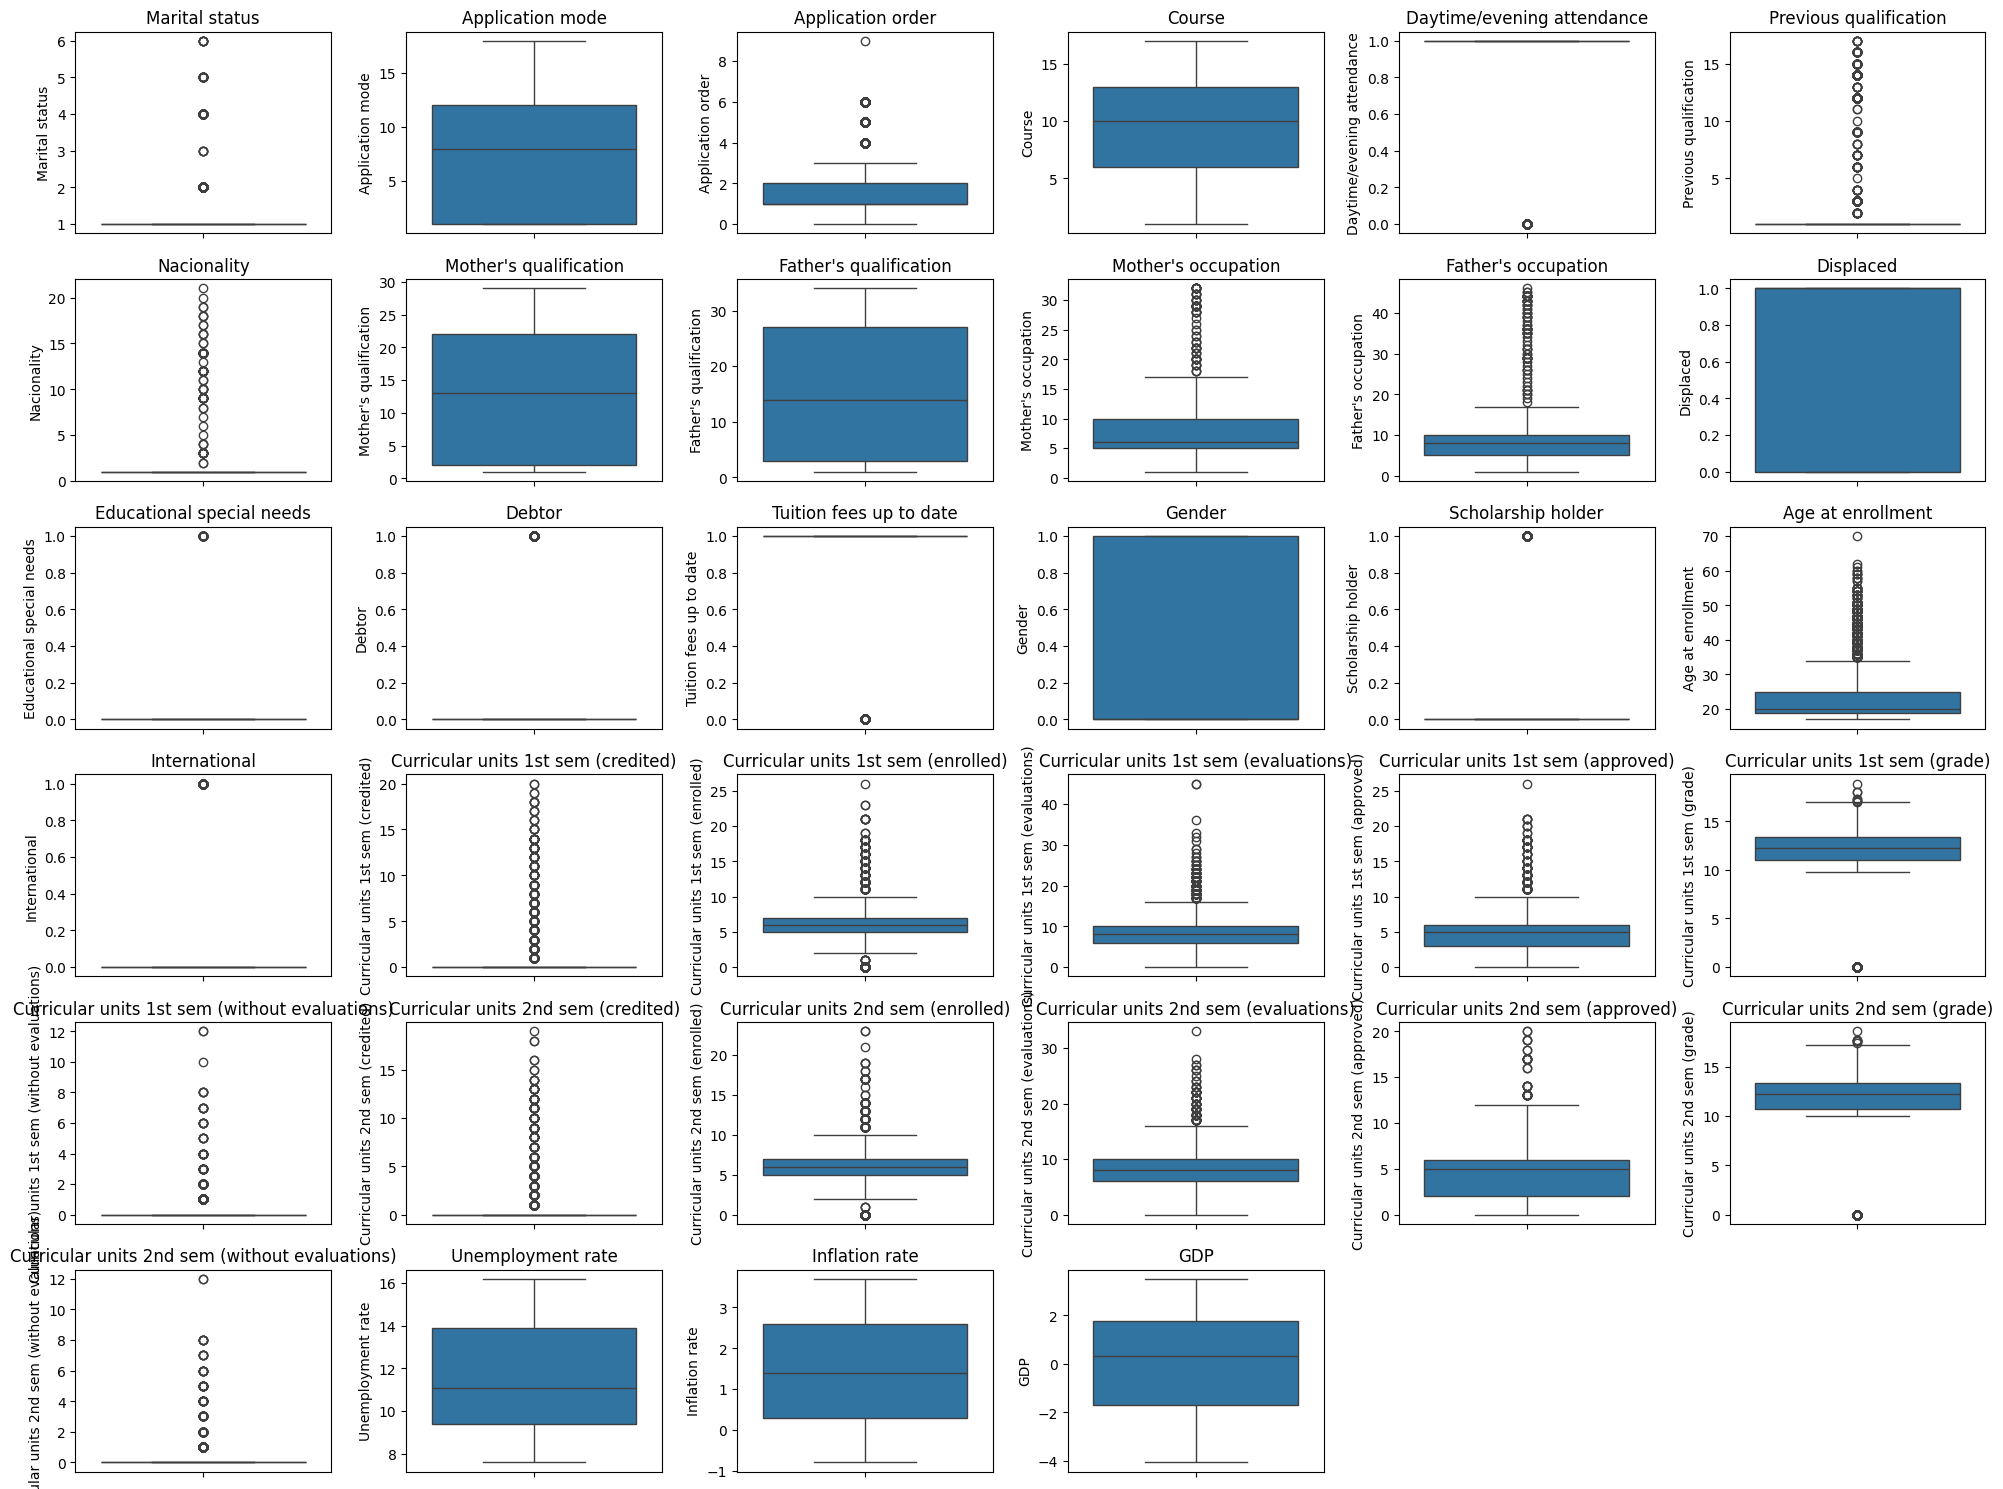

In [ ]:
# 결측치 재확인 (합계로 보여주기)
print("컬럼별 결측치 개수:")
print(df.isnull().sum())

# 이상치 탐색을 위해 숫자형 데이터만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 목표 변수인 'Target'은 숫자형으로 변환하지 않았으므로 제외

print('\n----- 이상치 탐지를 위한 각 컬럼별 박스플롯 시각화 -----')
plt.figure(figsize=(20, 15)) # 전체 그림 크기 조정
for i, col in enumerate(numeric_df.columns):
    plt.subplot(6, 6, i + 1) # 6x6 격자로 그림을 나눔
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### 결측치와 이상치 탐색 결과

- 결측치 개수 0,

- 이상치 관찰 결과
    - **범주형 코드값을 가진 변수들의 "이상치":**
      - 범주형 특성상 이상치라기보단 각 범주에 해당하는 수치일 가능성 높음

    - **연속형 변수들의 이상치:**
      - Age at enrollment: 상단에 이상치 많음
         
         대부분의 학생이 20대 초중반에 입학하지만, 30대 후반부터 70세에 이르는 고연령 학생들도 소수 존재

      - **학점 관련 변수들 (Curricular units ...):**
      
        **credited (인정 학점) 및 (without evaluations) (평가 미실시 과목 수):**
        <br>대부분의 값이 0에 집중되어 있고, 0보다 큰 값들이 이상치로 나타남. 이는 소수의 학생만이 학기 시작 전 인정 학점을 받거나 평가를 받지 않은 과목이 있음을 의미

        **enrolled (등록 학점), evaluations (평가 과목 수), approved (통과 학점 수):**
        <br>전반적으로 분포가 안정적이지만, 상단에 일부 이상치들이 관찰됨. 이는 평균보다 훨씬 많은 학점을 신청하거나, 많은 과목을 평가/통과한 소수의 학생들이 존재함을 나타냄.

        **grade (평균 성적):**
        <br>1학기와 2학기 성적 모두 하단에 0점 근처의 이상치들이 관찰됨. 이는 학업 성취도가 매우 낮은 학생들일 가능성

         
- 종합:
<br>결측치는 존재하지 않아 데이터 정제에 유리.
<br>범주형 변수가 숫자 코드. 정리한 자료를 사용해서 해석 필요
<br>Age at enrollment와 같이 실제 연속형 변수에서 관찰되는 극단적인 값들은 모델 성능에 영향을 미칠 수 있으므로, 다음 단계인 변수 분포 시각화를 통해 데이터의 특성을 더 자세히 파악하고 이상치 처리 전략을 수립할 필요 있음.

## 05. 변수 분포 및 시각화

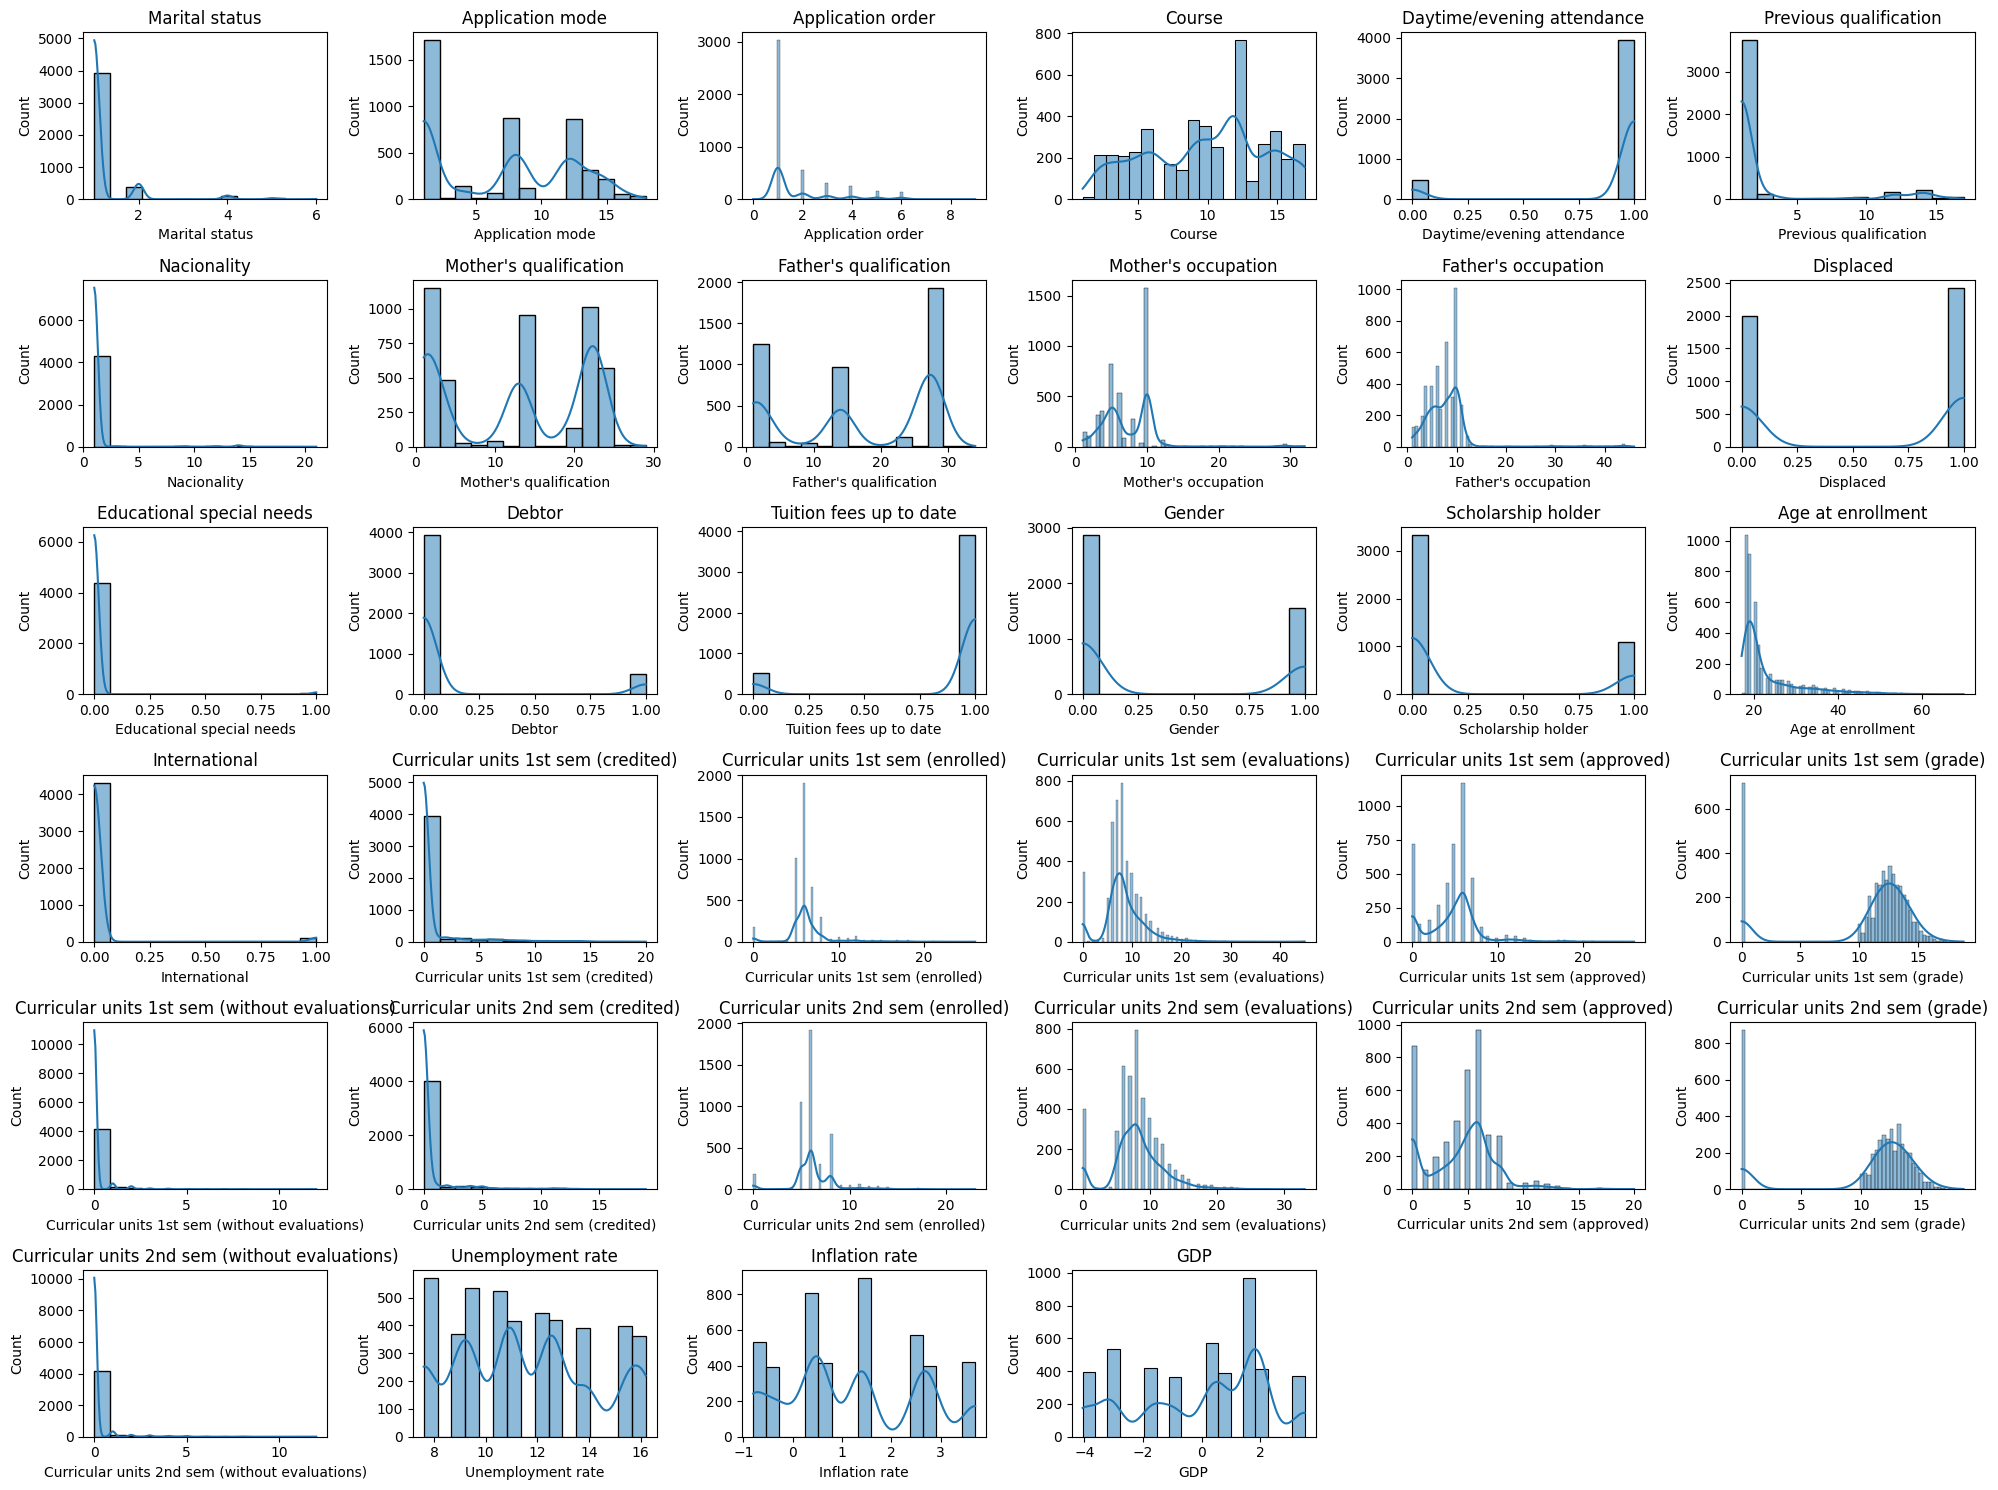

In [ ]:
# 숫자형 변수들의 히스토그램 그리기
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(6, 6, i + 1) # 6x6 격자로 그림을 나눔
    sns.histplot(df[col], kde=True) # 히스토그램과 함께 밀도 곡선(kde) 표시
    plt.title(col)
plt.tight_layout()
plt.show()

### **변수별 분포 시각화 결과 해석**

#### **범주형 코드값을 가진 변수들:**

숫자 코드로 이루어져 카테고리 자체가 적은 변수.
<br> 특정 값에 데이터가 크게 집중되어 있음.
<br>이는 이전 박스 플롯에서 확인한 소수 그룹의 존재와 일치.

#### **연속형 변수들:**
Age at enrollment:
<br>대부분의 학생이 10대 후반에서 20대 초반에 입학하지만, 30대 이상의 고연령 학생도 소수 존재함


**학점 관련 변수들 (Curricular units ...):**<br>
  - **credited (인정 학점) 및 (without evaluations) (평가 미실시 과목 수):**
    
  0에 데이터가 매우 높게 집중되어 있음. 이는 대부분의 학생이 해당 사항이 없으며, 소수의 학생만이 값을 가짐을 의미함.

- **enrolled (등록 학점), evaluations (평가 과목 수), approved (통과 학점 수):**<br>
  
  대체로 한쪽으로 약간 치우친 단봉형 분포.
  <br>대부분의 학생이 특정 범위 내의 학점/과목 수를 이수
  <br>평균보다 더 많은 학점/과목을 이수하는 학생들도 존재함.
- **grade (평균 성적):**
<br>1학기와 2학기 성적 모두 10~14점 사이에 데이터가 집중되어 있는 단봉형 분포를 보임.<br>0점에 가까운 낮은 성적대의 학생들도 소수 존재.

**거시 경제 지표 (Unemployment rate, Inflation rate, GDP)**

이 변수들은 비교적 여러 개의 봉우리를 가지는 다봉형 분포 또는 평평한 분포(Uniform-like)의 모습을 보임.
<br>이는 데이터 수집 기간 동안 해당 경제 지표들이 특정 값 주변에 머무르기보다는 다양한 값을 가졌음을 의미.
- Unemployment rate: 7.6% ~ 16.2% 사이에서 여러 봉우리를 보입니다.
- Inflation rate: -0.8% ~ 3.7% 사이에서 비교적 넓게 퍼져 있습니다.
- GDP: -4.06% ~ 3.51% 사이에서 여러 봉우리를 보입니다.

**종합:**

대부분의 범주형 코드 변수들은 특정 값에 데이터가 크게 쏠려 있는 불균형한 분포.<br> 모델링 시 샘플링 기법이나 가중치 조정을 고려해야 할 수도 있음.
<br>Age at enrollment와 같이 오른쪽으로 심하게 치우친 변수는 로그 변환, 혹은 삭제 등의 전처리 방법을 통해 분포를 완화시키는 것을 고려해볼 수 있음.<br>
학점 관련 변수들 또한 대부분 0에 집중되거나 오른쪽으로 꼬리가 긴 분포를 보여, 학업 성취에 있어 학생들 간의 편차가 존재함을 알 수 있습니다.
거시 경제 지표들은 다양한 값을 가지며, 특정 시기의 경제 상황이 학생들의 학업에 미치는 영향을 분석해볼 가치가 있습니다.


## 06. 변수 간 관계 시각화

35개의 페어플롯은 너무 많아서 몇 개의 가설을 세워 관계 시각화 실시

**가설 1:**

학업 성취도가 높을수록 졸업 가능성이 높고, 낮을수록 중퇴 가능성이 높을 것이다.
<br>**관련 변수:** Target_Encoded, Curricular units 1st sem (grade), Curricular units 2nd sem (grade), Curricular units 1st sem (approved), Curricular units 2nd sem (approved)

**가설 2:**

재정적 안정성이 학업 지속에 중요한 영향을 미칠 것이다.
<br>**관련 변수:** Target_Encoded, Tuition fees up to date, Scholarship holder, Debtor

**가설 3:**

입학 시 나이가 많을수록 학업 지속에 어려움을 겪을 가능성이 있다.
<br>**관련 변수:** Target_Encoded, Age at enrollment


In [ ]:
# target은 object이므로 타겟인코딩을 통해 숫자형으로 변환
from sklearn.preprocessing import LabelEncoder

# 원본 DataFrame을 복사해서 사용 (원본 데이터 보존)
df_encoded = df.copy()

# Target 변수 Label Encoding
label_encoder = LabelEncoder()
df_encoded['Target_Encoded'] = label_encoder.fit_transform(df_encoded['Target'])

# 인코딩된 Target과 원래 Target 매핑 확인 (참고용)
print("Target 변수 인코딩 매핑:")
for original_value, encoded_value in zip(df['Target'].unique(), df_encoded['Target_Encoded'].unique()):
    print(f"'{original_value}' -> {encoded_value}")

Target 변수 인코딩 매핑:
'Dropout' -> 0
'Graduate' -> 2
'Enrolled' -> 1



가설 1: 5개의 변수로 페어 플롯 작성:


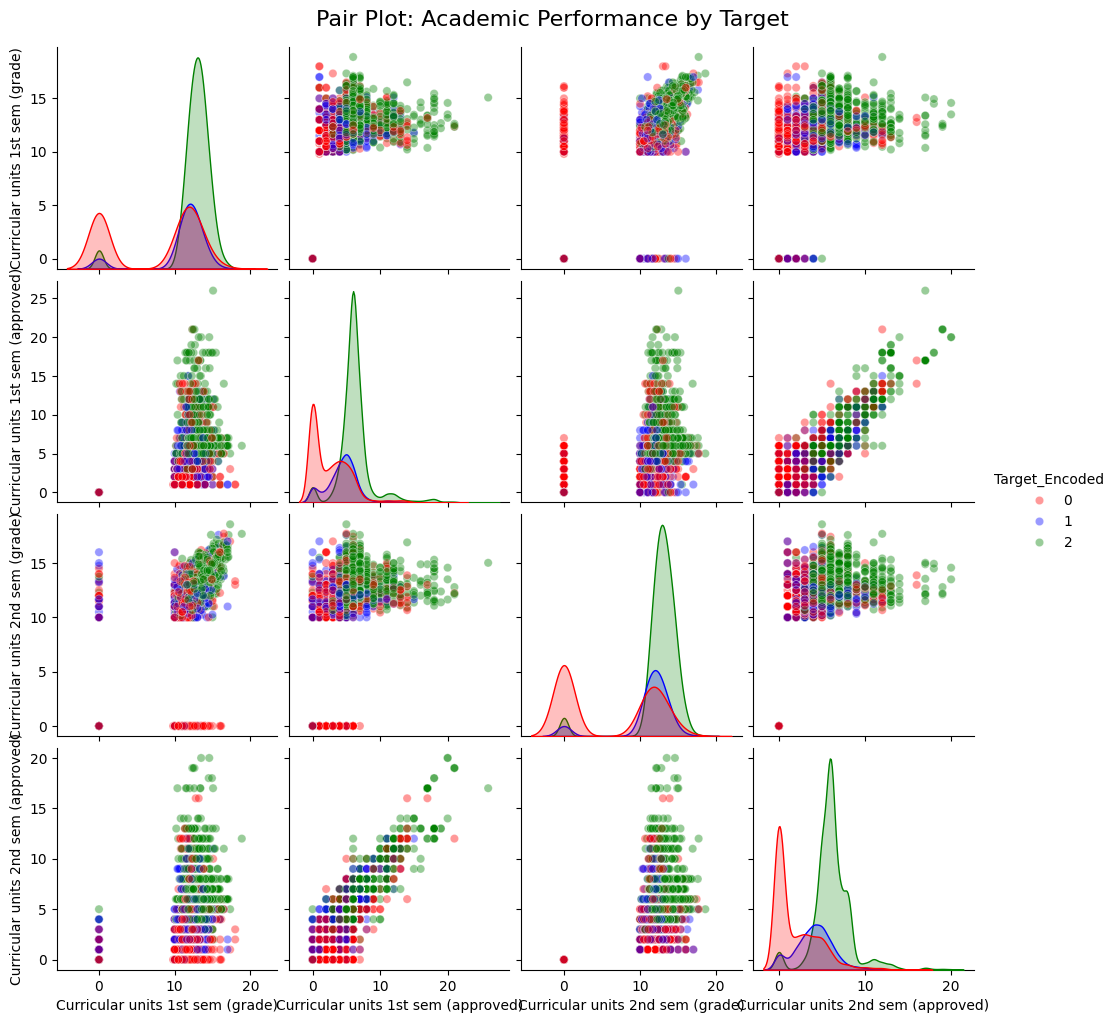

In [ ]:
# 가설 1 변수 선택
cols_combination1 = [
    'Target_Encoded',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (approved)'
]

print(f"\n가설 1: {len(cols_combination1)}개의 변수로 페어 플롯 작성:")
sns.pairplot(df_encoded[cols_combination1], hue='Target_Encoded', diag_kind='kde',
             palette={0: 'red', 1: 'blue', 2: 'green'}, # Dropout, Enrolled, Graduate
             plot_kws={'alpha': 0.4})
plt.suptitle('Pair Plot: Academic Performance by Target', y=1.02, fontsize=16)
plt.show()

가설 2: 6개의 변수로 페어 플롯 작성:


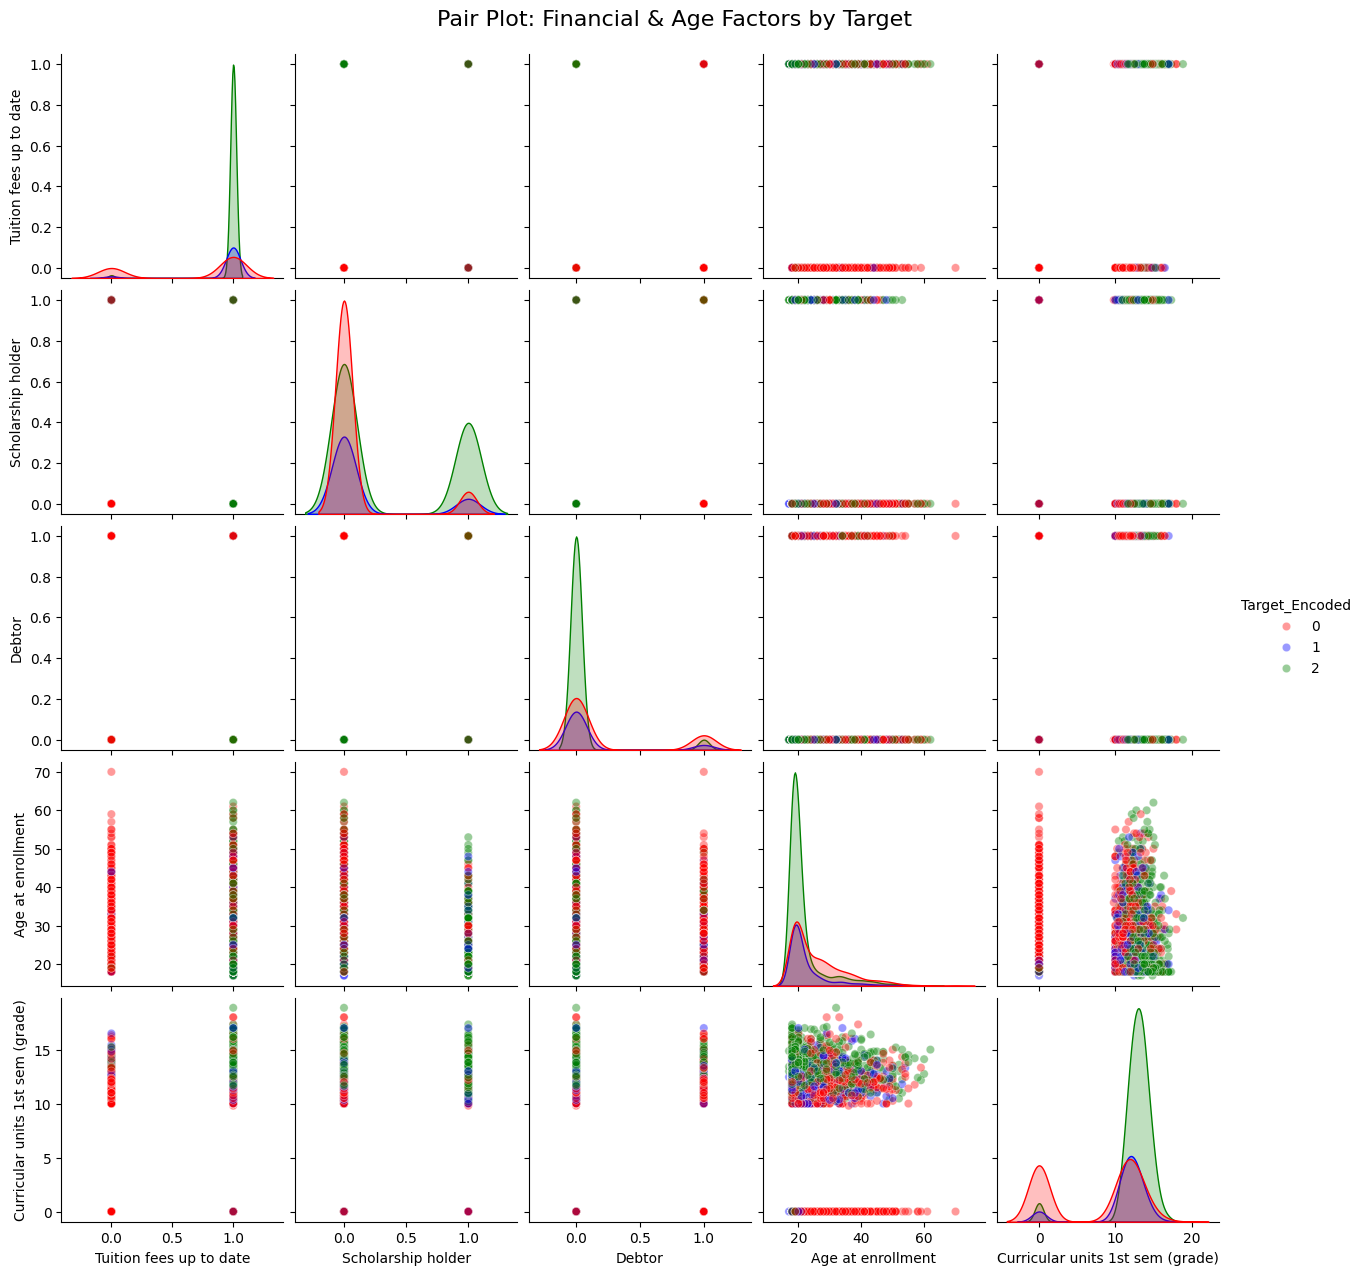

In [ ]:
# 가설 2 변수 선택
cols_combination2 = [
    'Target_Encoded',
    'Tuition fees up to date', # 0 또는 1 값
    'Scholarship holder',      # 0 또는 1 값
    'Debtor',                  # 0 또는 1 값
    'Age at enrollment',
    'Curricular units 1st sem (grade)' # 학업 성취도 대표 변수 하나 추가
]

print(f"가설 2: {len(cols_combination2)}개의 변수로 페어 플롯 작성:")

sns.pairplot(df_encoded[cols_combination2], hue='Target_Encoded', diag_kind='kde',
             palette={0: 'red', 1: 'blue', 2: 'green'},
             plot_kws={'alpha': 0.4})
plt.suptitle('Pair Plot: Financial & Age Factors by Target', y=1.02, fontsize=16)
plt.show()

가설 3: 4개의 변수로 페어 플롯 작성


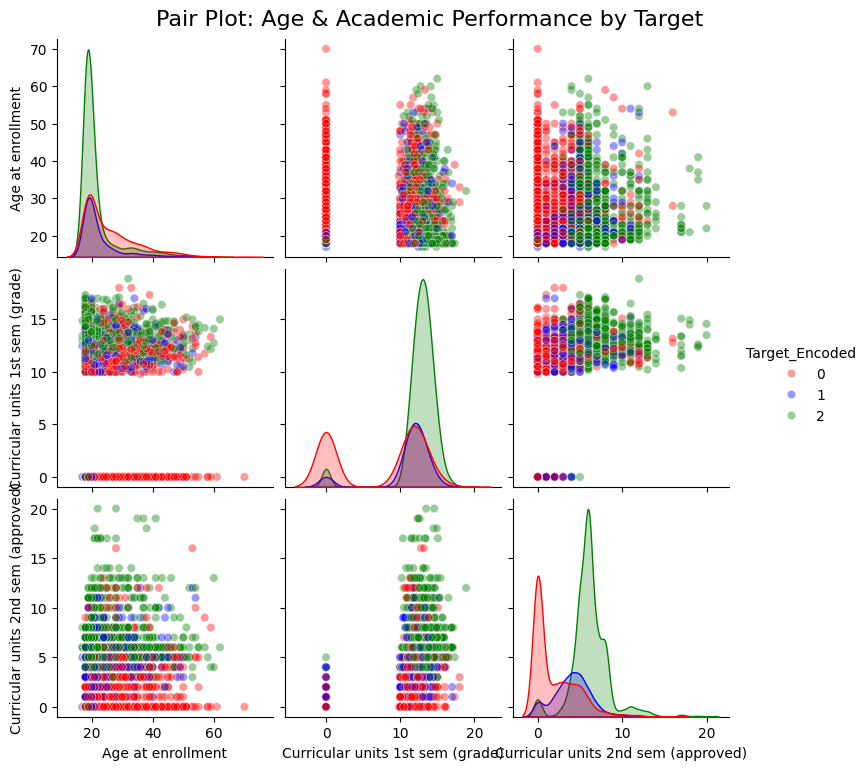

In [ ]:
# 가설 3 변수 선택
cols_combination3 = [
    'Target_Encoded',
    'Age at enrollment',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (approved)'
]

print(f'가설 3: {len(cols_combination3)}개의 변수로 페어 플롯 작성')
sns.pairplot(df_encoded[cols_combination3], hue='Target_Encoded', diag_kind='kde',
             palette={0: 'red', 1: 'blue', 2: 'green'}, # Dropout, Enrolled, Graduate
             plot_kws={'alpha': 0.4})
plt.suptitle('Pair Plot: Age & Academic Performance by Target', y=1.02, fontsize=16)
plt.show()

### 가설 1,2,3에 대한 결과 해석

#### **가설 1:**
<br>학업 성취도가 높을수록 졸업 가능성이 높고, 낮을수록 중퇴 가능성이 높을 것이다.

<br>모든 학업 성취도 변수(1학기/2학기 성적 및 통과 학점)에서
<br>Graduate(녹색) 그룹의 분포가 가장 오른쪽에 높게 형성되어 있음.
<br>Dropout(빨간색) 그룹의 분포는 가장 왼쪽에 낮게 형성되어 있음.
<br>Enrolled(파란색) 그룹은 그 중간에 위치하거나 Graduate 그룹과 유사한 분포

<br>이는 이전 박스 플롯 결과와 일치함.
<br>학업 성취도가 높을수록 졸업 가능성이, 낮을수록 중퇴 가능성이 높아진다는 가설 확인

**특히 Dropout 그룹은 성적이나 통과 학점 수가 0에 가까운 지점에 몰려있음.**

**학기 내 성적과 통과 학점 간의 관계:**
<br>Graduate(녹색) 점들은 대부분 오른쪽 상단에 밀집.
<br>Dropout(빨간색) 점들은 왼쪽 하단에 주로 분포.
<br>뚜렷한 양의 상관관계를 그룹별로 확인 가능.


**1학기 성과와 2학기 성과 간의 관계:**
<br>Graduate 그룹은 1학기 성적이 높을수록 2학기 성적도 높음.
<br>Dropout 그룹은 1학기 성적이 낮으면 2학기 성적도 낮은 경향이 있지만, 일부 1학기 성적이 어느 정도 있었음에도 2학기 성적이 매우 낮거나 0점인 경우도 관찰됨

**결론:**
<br>전반적으로 학업 성취도가 높은 학생들은 지속적으로 높은 성과를 유지하며 졸업하는 경향이 뚜렷하게 나타남.

<br>

#### **가설 2:**
<br>재정적 안정성이 학업 지속에 중요한 영향을 미칠 것이다.


<br>**Tuition fees up to date:**
<br>Graduate(녹색) 그룹은 대부분 값이 1(완납)에 집중.
<br>Dropout(빨간색) 그룹은 값이 0(미납)인 경우가 상대적으로 더 많이 보임.

**Scholarship holder:**
<br>Graduate(녹색) 그룹에서 장학금 수혜자의 비율이 Dropout(빨간색) 그룹보다 높음.

**Debtor:**
<br>Dropout(빨간색) 그룹에서 채무자의 비율이 Graduate(녹색) 그룹보다 확연히 높음.

**Age at enrollment:**
<br>Dropout(빨간색) 그룹의 나이 분포가 다른 그룹에 비해 오른쪽으로 더 넓게 퍼져 있으며, 특히 고연령대에서 빨간색 점들이 더 많이 관찰됨.

**Curricular units 1st sem (grade):**
<br>Graduate 그룹의 성적 분포가 높음

**Tuition fees up to date vs. Target_Encoded:**
<br>등록금 완납(1)인 경우 녹색(Graduate) 점들이, 미납(0)인 경우 빨간색(Dropout) 점들이 더 많이 보임.

**Debtor vs. Target_Encoded:**
<br>채무자(1)인 경우 빨간색(Dropout) 점들이 많음.

**Age at enrollment vs. Curricular units 1st sem (grade):**
<br>Graduate(녹색) 그룹은 다양한 연령대에서 비교적 높은 성적을 유지.
<br>Dropout(빨간색) 그룹은 특히 나이가 많은 구간에서 낮은 성적대에 점들이 분포.

**결론:**
<br>전반적으로 재정적 어려움(등록금 미납, 채무)은 중퇴와 관련이 높아 보이며, 장학금 수혜는 졸업과 긍정적인 관계가 있는 것으로 보임.
<br>나이가 많은 학생들 중 학업 성취도가 낮은 경우 중퇴로 이어질 가능성 높음

#### <br>**가설 3:**

<br>입학 시 나이가 많을수록 학업 지속에 어려움을 겪을 가능성이 있다 (학업 성취도와 연관하여).

**<br>Age at enrollment:**
<br>Dropout(빨간색) 그룹은 젊은 연령대에도 분포하지만20대 후반 이후부터 다른 그룹에 비해 상대적으로 더 많은 학생이 분포하며 오른쪽으로 긴 꼬리를 형성. <br>Graduate(녹색) 그룹은 20대 초반에 가장 집중.

**Curricular units 1st sem (grade) 및 Curricular units 2nd sem (approved):**
<br>이전과 동일하게 Graduate 그룹이 가장 높은 성과를, Dropout 그룹이 가장 낮은 성과를 보임.

**Age at enrollment vs. Curricular units 1st sem (grade):**
<br>Dropout(빨간색) 그룹에서 나이가 증가함에 따라 성적이 낮은 쪽에 점들이 더 많이 분포하는 경향이 관찰됨.
<br>Graduate(녹색) 그룹은 다양한 연령대에 걸쳐 비교적 높은 성적을 유지하는 학생들이 많음.

**Age at enrollment vs. Curricular units 2nd sem (approved):**
<br>유사한 패턴으로, Dropout 그룹은 나이가 많을수록 통과 학점 수가 낮은 경향을 보임.

**Curricular units 1st sem (grade) vs. Curricular units 2nd sem (approved):**
<br>Graduate 그룹은 1학기 성적이 좋을수록 2학기 통과 학점 수도 높은 뚜렷한 양의 관계를 보임.
<br>Dropout 그룹은 전반적으로 이 두 지표 모두 낮은 영역에 분포.

**결론:**
<br>이 결과들은 입학 시 나이가 많은 것이 직접적인 원인은 아닐 수 있지만, 나이가 많은 학생들 중 학업 성취도가 낮은 경우 중퇴 위험이 더 커질 수 있음을 시사함.

#### **종합적인 인사이트:**

학업 성취도는 졸업/중퇴를 가르는 매우 중요한 핵심 요인.
<br>1, 2학기 성적 및 통과 학점 수는 Target과 뚜렷한 관계를 보임.

재정적 안정성 또한 학업 지속에 중요한 역할을 하는 것으로 보임.
<br>등록금 완납 및 장학금 수혜는 긍정적인 영향을, 채무는 부정적인 영향을 미치는 경향이 있음

입학 시 나이는 그 자체로 결정적인 요인은 아니지만, 다른 요인(특히 학업 성취도)과 결합되었을 때 학업 결과에 영향을 미칠 수 있는 변수.
<br>고연령 학생들의 학업 지원 방안 마련이 필요.

## 07. 상관관계 및 교차분석

### 연속형 데이터와 범주형 데이터로 나눠서 분석
연속형 데이터는 상관 관계 히트맵으로
<br>범주형 데이터는 Target과의 상관관계를 각각 시각화

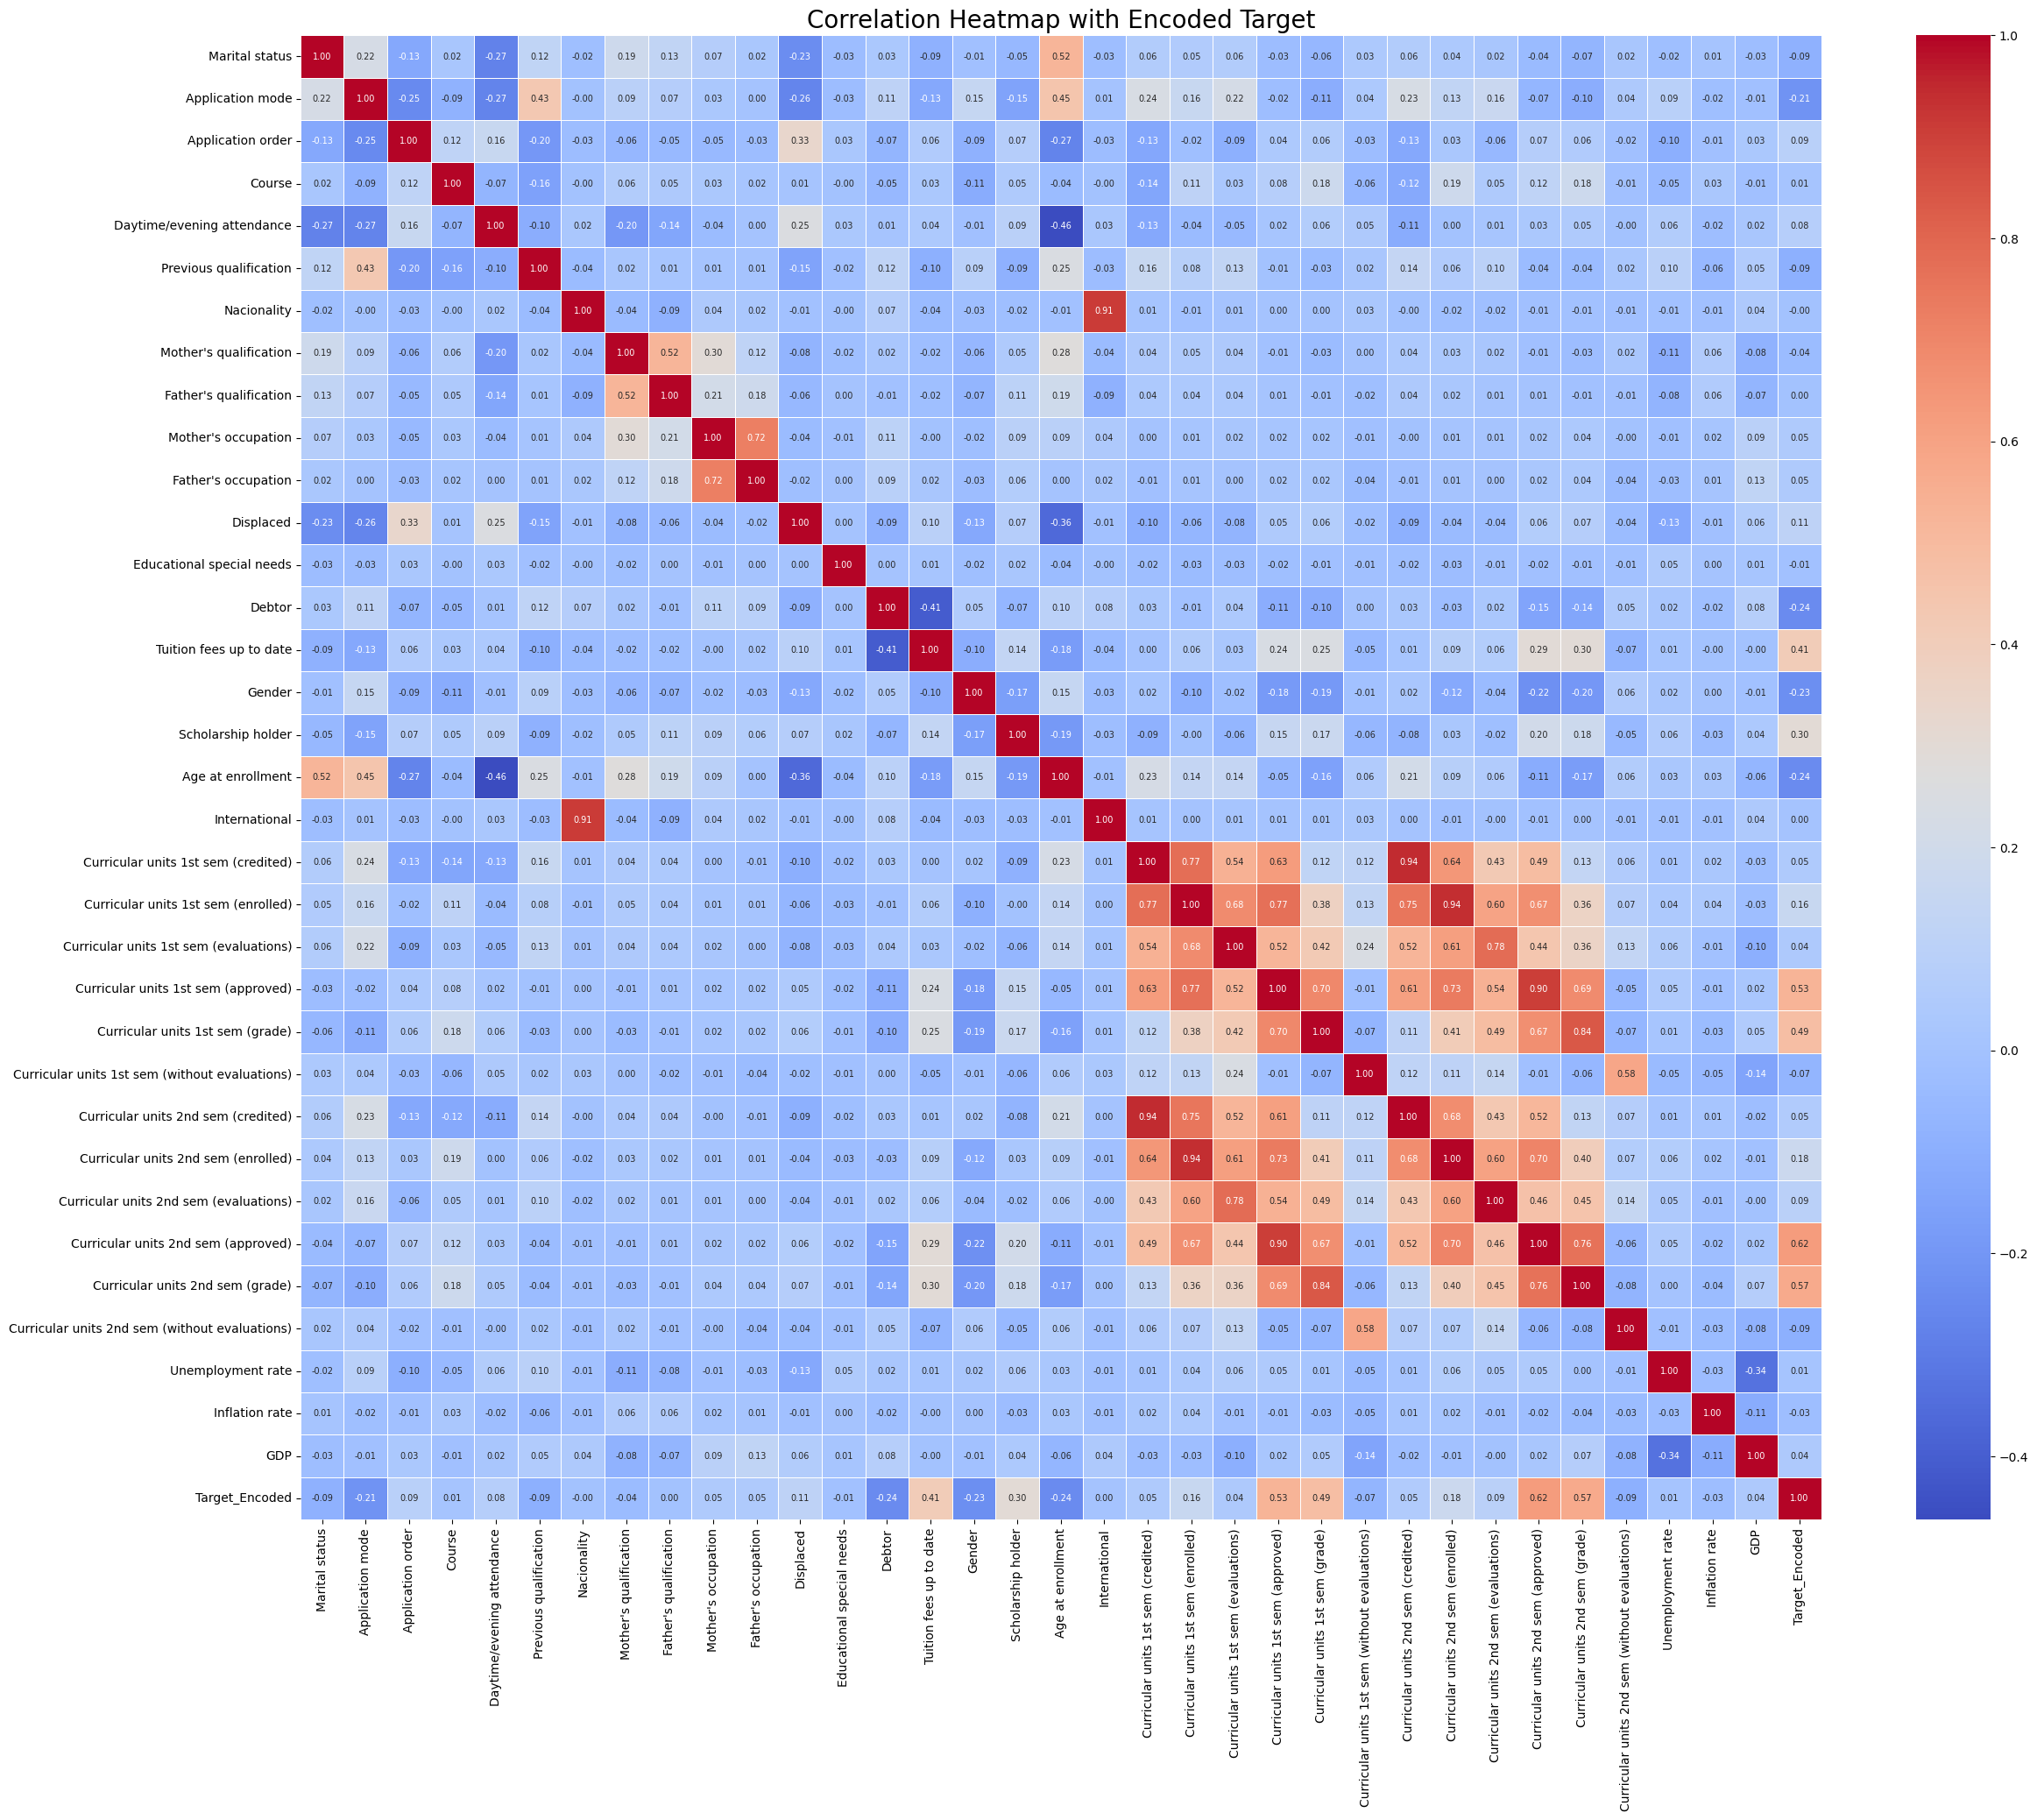


Target_Encoded와의 상관계수 (절대값 내림차순 정렬):
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Age at enrollment                                 0.243438
Debtor                                            0.240999
Gender                                            0.229270
Application mode                                  0.212025
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Displaced                                         0.113986
Curricular units 2nd sem (without evaluations)    0.094028
Curricular units 2nd sem (evaluations)            0.092721
Previous qualification                            0.091365
Marital status    

In [ ]:
# 연속형 데이터 상관관계 히트맵

# Target 변수 Label Encoding
label_encoder = LabelEncoder()
df_encoded['Target_Encoded'] = label_encoder.fit_transform(df_encoded['Target'])

numeric_cols = list(df_encoded.select_dtypes(include=['float64', 'int64']).columns)

# 원본 Target 컬럼(object 타입)은 상관계산에서 제외
if 'Target' in numeric_cols:
    numeric_cols.remove('Target')

correlation_matrix_with_target = df_encoded[numeric_cols].corr()

# 히트맵 그리기
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix_with_target, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 7}) # annot 글자 크기 조절
plt.title('Correlation Heatmap with Encoded Target', fontsize=20)
plt.show()

# Target_Encoded와 다른 변수들 간의 상관계수만 따로 출력해서 보기 쉽게 하기
print("\nTarget_Encoded와의 상관계수 (절대값 내림차순 정렬):")
# Target_Encoded와의 상관계수를 가져와서 절대값 기준으로 내림차순 정렬
target_correlations = correlation_matrix_with_target['Target_Encoded'].drop('Target_Encoded') # 자기 자신과의 상관계수는 제외
print(target_correlations.abs().sort_values(ascending=False))

### 상관관계 결과 분석

상관관계 히트맵으로 변수들과 목표 변수인 Target의 연관성 분석

#### 목표 변수(Target) 인코딩

'Dropout' -> 0

'Graduate' -> 2

'Enrolled' -> 1

#### 상관관계 분석

**학업 성취도의 강한 영향력:**

1학기 및 2학기 통과 학점 수와 평균 성적이 가장 큰 양의 상관관계

학업 성취도가 높을수록 졸업 가능성이 크고, 낮을수록 중퇴 가능성이 높음

특히 학업 성취도 관련 변수들도 서로 높은 양의 상관관계를 보임
<br>(예: 1학기 성적과 2학기 성적 간 0.84)

**재정적 요인의 유의미한 관계:**

**Tuition fees up to date (등록금 완납 여부)**
<br>0.41의 양의 상관관계를 보임.
<br>등록금을 완납이 졸업 가능성을 높임

**Scholarship holder (장학금 수혜 여부)**
<br>0.30의 양의 상관관계

**Debtor (채무 여부)**
<br>-0.24의 음의 상관관계를 보임.
<br>채무가 있을 경우 중퇴 가능성이 높아짐.

**인구 통계학적 및 지원 관련 요인:**

**Age at enrollment (입학 시 나이)**
<br>-0.24의 음의 상관관계를 보임.
<br>나이가 많을수록 중퇴 가능성이 높아짐.

**Gender (성별)**는
<br>-0.23의 음의 상관관계
<br>남학생일수록 중퇴 또는 재학 가능성이 상대적으로 높을 수 있음

**Application mode (지원 방식)**
<br>-0.21의 음의 상관관계를 보임.
<br>각 코드값의 의미 파악이 중요합니다.

다중공선성 가능성:

<br>학기별 등록 학점(enrolled),
<br>평가 과목 수(evaluations),
<br>통과 학점 수(approved) 간 서로 높은 양의 상관관계(0.6 이상)
<br>이는 이 변수들이 유사한 정보를 많이 공유하고 있을 가능성을 의미
<br>모델링 시 다중공선성 문제를 야기할 수 있으므로 변수 선택 과정에서 주의 필요.

**결론:**

상관관계 분석 결과, 학생들의 학업 성취도와 재정적 안정성이 최종 학업 결과에 가장 큰 영향을 미치는 주요 요인으로 파악됨.
또한, 입학 시 나이, 성별, 특정 지원 방식 등도 유의미한 관계가 보임.


### 범주형 변수들간의 관계 파악을 위해 가설 설정 및 교차분석


**가설 1:**
재정적 안정성은 학업 결과에 긍정적인 영향을 미칠 것이다.

**세부 가설 1-1:**
<br>등록금을 제때 납부하는 학생(Tuition fees up to date = 1)은 그렇지 않은 학생보다 졸업(Graduate) 비율이 높고 중퇴(Dropout) 비율이 낮을 것이다.

**세부 가설 1-2:**
<br>채무가 없는 학생(Debtor = 0)은 채무가 있는 학생보다 졸업(Graduate) 비율이 높고 중퇴(Dropout) 비율이 낮을 것이다.

**확인 변수:**
<br>Tuition fees up to date, Debtor vs. Target
<br>

**<br>가설 2:**
<br>장학금 수혜 여부는 학업 결과에 긍정적인 영향을 미칠 것이다.

**세부 가설 2-1:**
<br>장학금을 받는 학생(Scholarship holder = 1)은 그렇지 않은 학생보다 졸업(Graduate) 비율이 높고 중퇴(Dropout) 비율이 낮을 것이다.

**확인 변수:**
<br>Scholarship holder vs. Target

**<br>가설 3:**
<br>성별에 따라 학업 결과 분포에 차이가 있을 것이다.

**세부 가설 3-1:**
<br>남학생과 여학생 간에 졸업(Graduate) 또는 중퇴(Dropout) 비율에 유의미한 차이가 나타날 것이다.

**확인 변수:**
<br>Gender vs. Target

**가설 4:**
<br>입학 시 연령은 학업 결과와 관련이 있을 것이다 (특히 고연령층).

**세부 가설 4-1:**
<br>입학 시 나이(Age at enrollment)가 많은 학생 그룹은 상대적으로 중퇴(Dropout) 비율이 높을 수 있다.

**확인 변수:**
<br>Age at enrollment vs. Target (연속형-범주형 관계)

**<br>가설 5:**
<br>수업 참여 방식(주간/야간)은 학업 결과에 영향을 미칠 것이다.

**세부 가설 5-1:**
<br>주간 학생(Daytime/evening attendance = 1)과 야간 학생(Daytime/evening attendance = 0) 간에 학업 결과 분포에 차이가 있을 것이다.

**확인 변수:**
<br>Daytime/evening attendance vs. Target

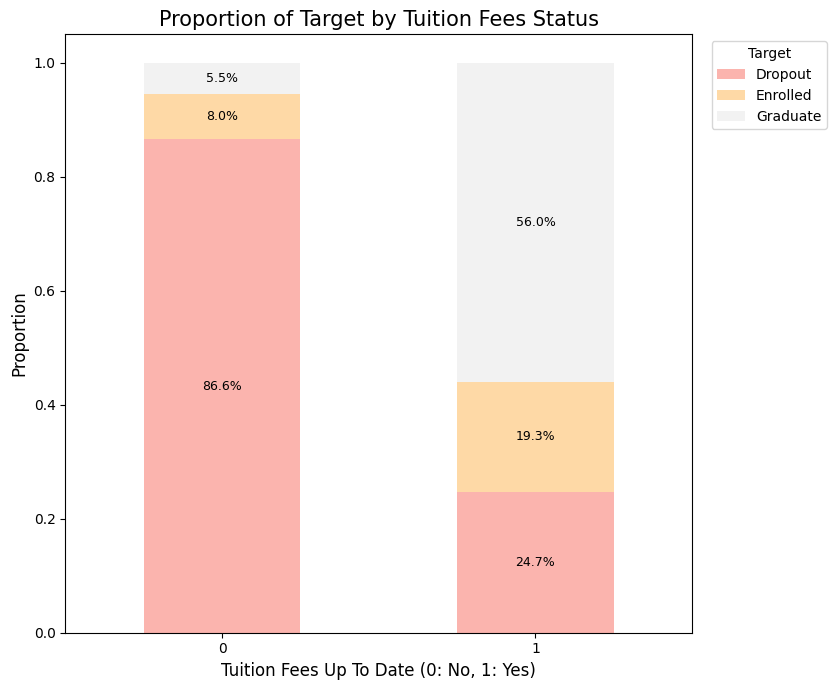

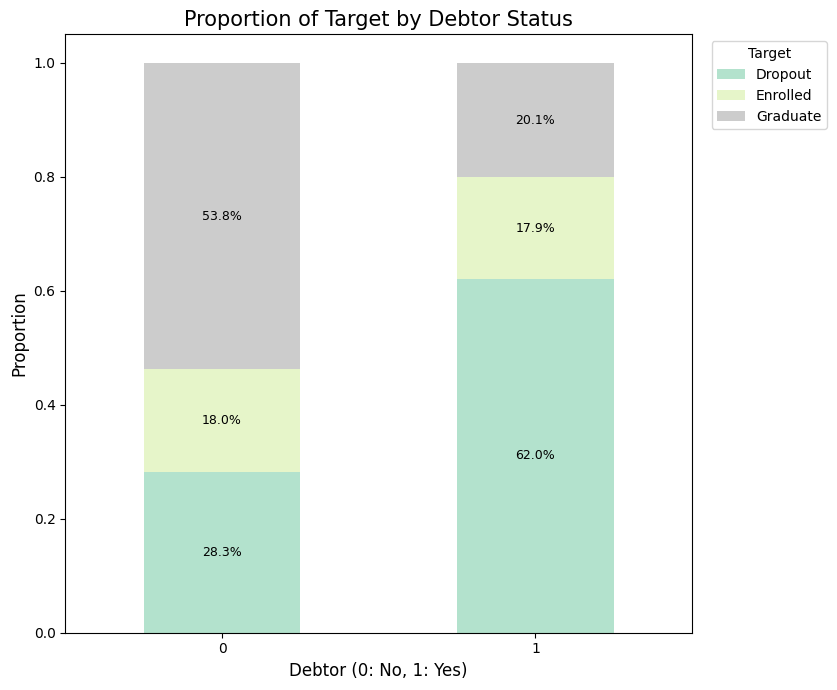

In [ ]:
# 가설 1-1: 등록금 완납 여부(Tuition fees up to date)와 학업 결과(Target) 관계

# 1. 교차표 생성 (각 Tuition status 내에서의 Target 비율)
tuition_target_ratio = pd.crosstab(index=df['Tuition fees up to date'],
                                   columns=df['Target'],
                                   normalize='index') # 각 행의 합이 1이 되도록 정규화

# 2. 시각화 (100% 기준 누적 막대 그래프)
ax_tuition = tuition_target_ratio.plot(kind='bar',
                                     stacked=True, # 누적 막대 그래프
                                     figsize=(10, 7), # 그래프 크기
                                     colormap='Pastel1') # 색상 팔레트

plt.title('Proportion of Target by Tuition Fees Status', fontsize=15)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Tuition Fees Up To Date (0: No, 1: Yes)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Target', bbox_to_anchor=(1.02, 1), loc='upper left')

# 각 막대에 비율 텍스트 추가
for c in ax_tuition.containers:
    # 퍼센트 형태로 포맷팅
    labels = [f'{w*100:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax_tuition.bar_label(c, labels=labels, label_type='center', fontsize=9, color='black')

plt.tight_layout(rect=[0, 0, 0.85, 1]) # 범례가 잘리지 않도록 레이아웃 조정
plt.show()


# 가설 1-2: 채무 여부(Debtor)와 학업 결과(Target) 관계

# 1. 교차표 생성 (각 Debtor status 내에서의 Target 비율)
debtor_target_ratio = pd.crosstab(index=df['Debtor'],
                                  columns=df['Target'],
                                  normalize='index')

# 2. 시각화 (100% 기준 누적 막대 그래프)
ax_debtor = debtor_target_ratio.plot(kind='bar',
                                   stacked=True,
                                   figsize=(10, 7),
                                   colormap='Pastel2')

plt.title('Proportion of Target by Debtor Status', fontsize=15)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Debtor (0: No, 1: Yes)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Target', bbox_to_anchor=(1.02, 1), loc='upper left')

for c in ax_debtor.containers:
    labels = [f'{w*100:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax_debtor.bar_label(c, labels=labels, label_type='center', fontsize=9, color='black')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

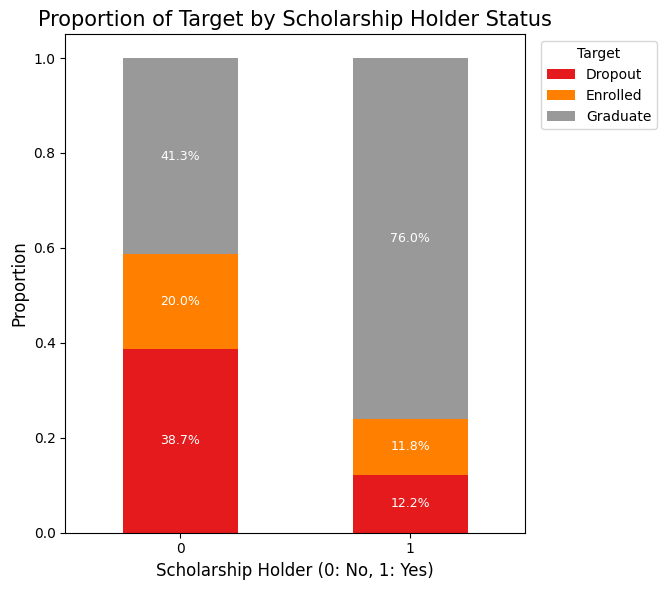

In [ ]:
# 가설 2: 장학금 수혜 여부(Scholarship holder)와 학업 결과(Target) 관계

# 1. 교차표 생성 (각 Scholarship status 내에서의 Target 비율)
scholarship_target_ratio = pd.crosstab(index=df['Scholarship holder'],
                                       columns=df['Target'],
                                       normalize='index')

# 2. 시각화 (100% 기준 누적 막대 그래프)
ax_scholarship = scholarship_target_ratio.plot(kind='bar',
                                             stacked=True,
                                             figsize=(8, 6),
                                             colormap='Set1') # 다른 색상 팔레트 사용

plt.title('Proportion of Target by Scholarship Holder Status', fontsize=15)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Scholarship Holder (0: No, 1: Yes)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Target', bbox_to_anchor=(1.02, 1), loc='upper left')

for c in ax_scholarship.containers:
    labels = [f'{w*100:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax_scholarship.bar_label(c, labels=labels, label_type='center', fontsize=9, color='white')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

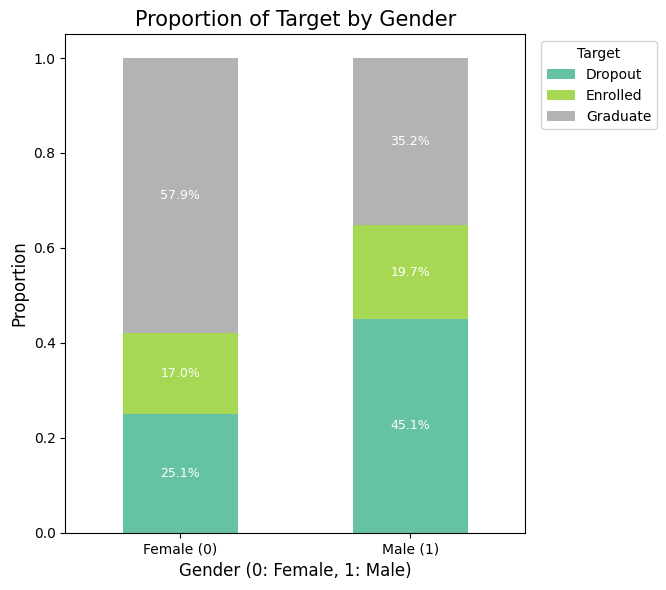

In [ ]:
# 가설 3: 성별(Gender)과 학업 결과(Target) 관계

# 1. 교차표 생성 (각 Gender 내에서의 Target 비율)
gender_target_ratio = pd.crosstab(index=df['Gender'],
                                  columns=df['Target'],
                                  normalize='index')

# 2. 시각화 (100% 기준 누적 막대 그래프)
ax_gender = gender_target_ratio.plot(kind='bar',
                                   stacked=True,
                                   figsize=(8, 6),
                                   colormap='Set2')

plt.title('Proportion of Target by Gender', fontsize=15)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Gender (0: Female, 1: Male)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Female (0)', 'Male (1)'], rotation=0)
plt.legend(title='Target', bbox_to_anchor=(1.02, 1), loc='upper left')

for c in ax_gender.containers:
    labels = [f'{w*100:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax_gender.bar_label(c, labels=labels, label_type='center', fontsize=9, color='white')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

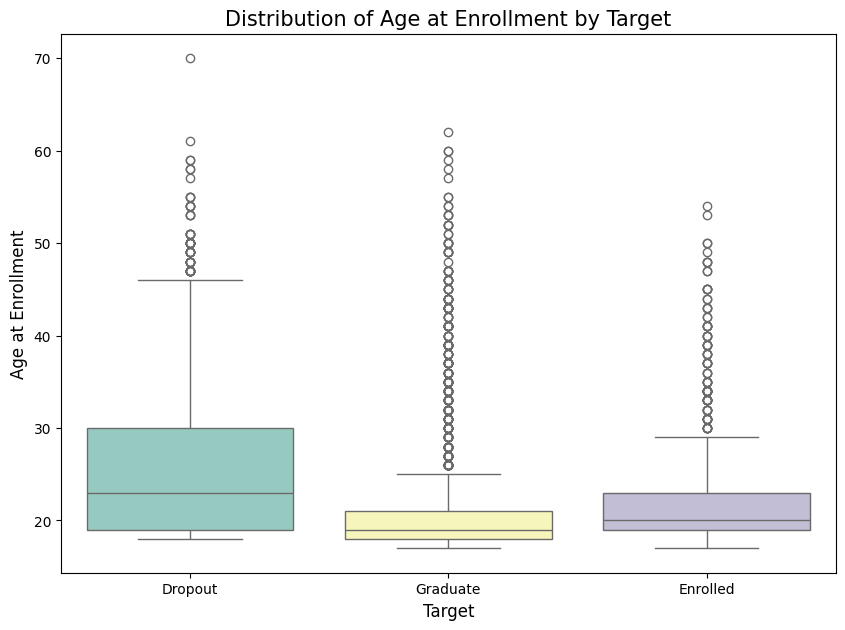

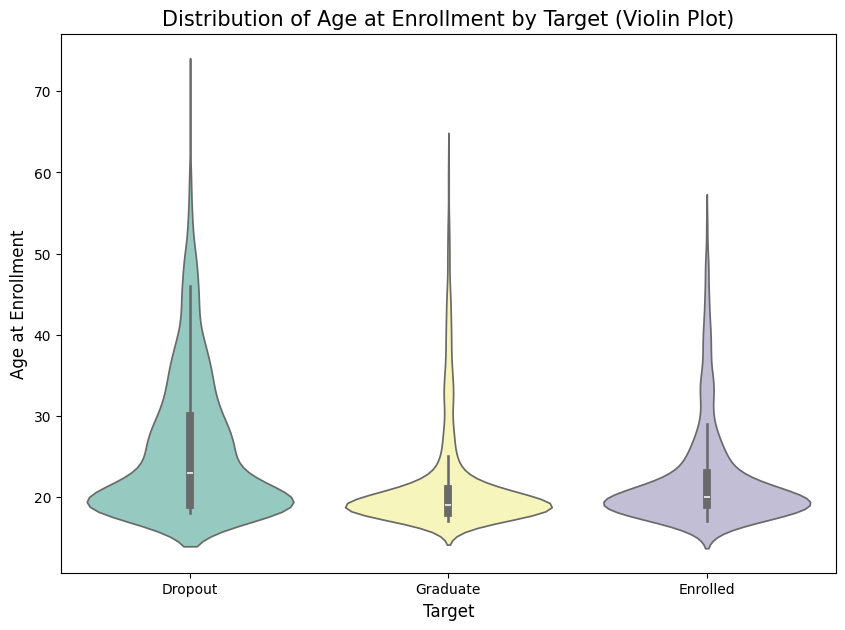

In [ ]:
# 가설 4: 입학 시 나이(Age at enrollment)와 학업 결과(Target) 관계

plt.figure(figsize=(10, 7))
sns.boxplot(x='Target', y='Age at enrollment', data=df, hue='Target', palette='Set3', legend=False)
plt.title('Distribution of Age at Enrollment by Target', fontsize=15)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Age at Enrollment', fontsize=12)
plt.show()

# 바이올린 플롯으로 분포 모양 파악
plt.figure(figsize=(10, 7))
sns.violinplot(x='Target', y='Age at enrollment', data=df, hue='Target', palette='Set3', legend=False)
plt.title('Distribution of Age at Enrollment by Target (Violin Plot)', fontsize=15)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Age at Enrollment', fontsize=12)
plt.show()

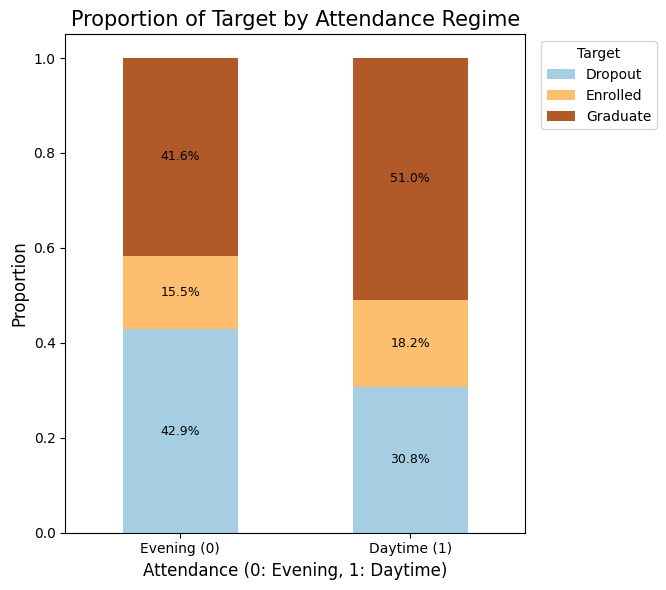

In [ ]:
# 가설 5: 수업 참여 방식(Daytime/evening attendance)과 학업 결과(Target) 관계

# 1. 교차표 생성 (각 Attendance status 내에서의 Target 비율)
attendance_target_ratio = pd.crosstab(index=df['Daytime/evening attendance'],
                                      columns=df['Target'],
                                      normalize='index')

# 2. 시각화 (100% 기준 누적 막대 그래프)
ax_attendance = attendance_target_ratio.plot(kind='bar',
                                           stacked=True,
                                           figsize=(8, 6),
                                           colormap='Paired')

plt.title('Proportion of Target by Attendance Regime', fontsize=15)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Attendance (0: Evening, 1: Daytime)', fontsize=12) # 코드 의미 명시
plt.xticks(ticks=[0, 1], labels=['Evening (0)', 'Daytime (1)'], rotation=0)
plt.legend(title='Target', bbox_to_anchor=(1.02, 1), loc='upper left')

for c in ax_attendance.containers:
    labels = [f'{w*100:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
    ax_attendance.bar_label(c, labels=labels, label_type='center', fontsize=9, color='black')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

### 가설 검증 및 해석

**1. 가설 1: 재정적 안정성은 학업 결과에 긍정적인 영향을 미칠 것이다.**

- 세부 가설 1-1: 등록금 완납 여부 (Tuition fees up to date) (input_file_0.png)

- 관찰: 등록금을 완납한 학생(1) 그룹은 미납한 학생(0) 그룹에 비해 Graduate 비율이 현저히 높고 (56.0% vs. 5.5%), Dropout 비율은 매우 낮음. (24.7% vs. 86.6%).

- 해석: 등록금 납부 여부는 학업 결과와 매우 강한 연관성을 보임. 등록금을 제때 납부하는 것이 학업을 지속하고 성공적으로 졸업하는 데 중요한 요인.

- 세부 가설 1-2: 채무 여부 (Debtor) (input_file_1.png)

- 관찰: 채무가 있는 학생(1) 그룹은 채무가 없는 학생(0) 그룹에 비해 Dropout 비율이 매우 높고 (62.0% vs. 28.3%), Graduate 비율은 현저히 낮음. (20.1% vs. 53.8%).

- 해석: 채무 여부 또한 학업 결과와 강한 부정적 연관성을 보입니다. 재정적 어려움이 중퇴의 주요 원인이 될 수 있음을 뒷받침합니다.

**2. 가설 2: 장학금 수혜 여부는 학업 결과에 긍정적인 영향을 미칠 것이다.**

- 확인 변수: Scholarship holder vs. Target (input_file_2.png)

- 관찰: 장학금 수혜 학생(1) 그룹은 비수혜 학생(0) 그룹에 비해 Graduate 비율이 매우 높고 (76.0% vs. 41.3%), Dropout 비율은 현저히 낮음. (12.2% vs. 38.7%).

- 해석: 장학금 수혜는 졸업률을 크게 높이고 중퇴율을 낮추는 데 매우 긍정적인 영향을 미치는 것으로 나타남. 재정적 지원이 학업 지속에 큰 도움이 됨을 알 수 있음.

**3. 가설 3: 성별에 따라 학업 결과 분포에 차이가 있을 것이다.**

- 확인 변수: Gender vs. Target (input_file_3.png)

- 관찰: 여성(0) 그룹은 남성(1) 그룹에 비해 Graduate 비율이 더 높고 (57.9% vs. 35.2%), Dropout 비율은 더 낮았습니다 (25.1% vs. 45.1%).

- 해석: 성별에 따라 학업 결과 분포에 뚜렷한 차이가 나타났습니다. 여성 학생들의 졸업률이 남학생들보다 높고, 중퇴율은 더 낮은 경향을 보임. 이는 상관관계 분석에서 Gender와 Target_Encoded 간의 음의 상관관계(-0.23, 여성=0, 남성=1, Target은 Graduate가 높은 값)와 일치하는 결과.

**4. 가설 4: 입학 시 연령은 학업 결과와 관련이 있을 것이다 (특히 고연령층).**

- 확인 변수: Age at enrollment vs. Target (input_file_4.png - Box Plot, input_file_5.png - Violin Plot)

- 관찰 (Box Plot & Violin Plot):

- Dropout 그룹의 입학 시 나이 분포가 Graduate 및 Enrolled 그룹에 비해 전반적으로 높고, 오른쪽으로 더 넓게 퍼져 있으며 이상치도 많이 관찰됨. 특히, 30세 이상의 연령대에서 Dropout 학생들의 비율이 상대적으로 높아 보임.

- Graduate 그룹은 상대적으로 젊은 연령대에 집중되어 있으며, 분포의 폭이 좁음.

- Enrolled 그룹은 Graduate 그룹과 유사한 연령 분포를 보이지만, Dropout 그룹보다는 낮은 연령대에 분포.

- 해석: 입학 시 연령이 많을수록, 특히 다른 요인과 결합될 때 중퇴 위험이 높아질 수 있음. 젊은 연령대의 학생들이 상대적으로 졸업률이 높은 경향을 보임.

**5. 가설 5: 수업 참여 방식(주간/야간)은 학업 결과에 영향을 미칠 것이다.**

- 확인 변수: Daytime/evening attendance vs. Target (input_file_6.png)

- 관찰: 주간(1) 학생 그룹은 야간(0) 학생 그룹에 비해 Graduate 비율이 더 높고 (51.0% vs. 41.6%), Dropout 비율은 더 낮음. (30.8% vs. 42.9%).

- 해석: 수업 참여 방식에 따라서도 학업 결과에 차이가 나타남. 주간 학생들이 야간 학생들보다 졸업률이 높고 중퇴율은 낮은 경향을 보임. 이는 야간 학생들이 학업 외 다른 요인(직장 등)으로 인해 학업에 집중하기 어려울 수 있음을 간접적으로 나타낼 수 있음.

### **종합적인 결론 및 추가 탐색 방향:**

- 학업 성취도(이전 단계에서 확인)와 재정적 요인(Tuition fees up to date, Debtor, Scholarship holder)은 학생들의 학업 결과에 매우 큰 영향을 미치는 핵심 요인으로 판단됨.

- 인구 통계학적 특성(Gender, Age at enrollment) 및 학업 환경(Daytime/evening attendance) 또한 학업 결과와 유의미한 관계를 보이며, 특정 그룹에서 졸업/중퇴 경향이 다르게 나타남을 확인.

## 08. 데이터 전처리
- 상관관계가 낮았던 것이나 고유값이 많은 컬럼 제거

- 대상컬럼: <br>'Course',
    <br>'Nacionality',
    <br>"Mother's qualification",
  <br>  "Father's qualification",
  <br>  "Mother's occupation",
  <br>  "Father's occupation",
  <br>  'Application mode',
   <br> 'Previous qualification',
   <br> 'Application order',
    <br>'International',
    <br>'Educational special needs',
    <br>'Unemployment rate',
    <br>'Inflation rate',
    <br>'GDP'

In [ ]:
# 원본 DataFrame 복사
df_cleaned = df.copy()

# 삭제할 컬럼 리스트 정의 (EDA 및 가설 기반)
cols_to_remove = [
    'Course',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    'Application mode',
    'Previous qualification',
    'Application order',
    'International',
    'Educational special needs',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

# 실제로 존재하는 컬럼만 삭제 (혹시 리스트에 오타가 있거나 이미 삭제된 경우를 대비)
existing_cols_to_remove = [col for col in cols_to_remove if col in df_cleaned.columns]

if existing_cols_to_remove:
    df_cleaned = df_cleaned.drop(columns=existing_cols_to_remove)
    print(f"--- 다음 컬럼들이 삭제되었습니다 ({len(existing_cols_to_remove)}개) ---")
    for col in existing_cols_to_remove:
        print(col)
else:
    print("--- 삭제할 컬럼이 데이터프레임에 존재하지 않습니다. ---")


print("\n--- 컬럼 정리 후 데이터프레임 정보 ---")
df_cleaned.info()
print("\n--- 정리 후 데이터프레임 컬럼 목록 ---")
print(df_cleaned.columns.tolist())
print("\n--- 정리 후 데이터프레임 앞부분 ---")
print(df_cleaned.head())

--- 다음 컬럼들이 삭제되었습니다 (14개) ---
Course
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Application mode
Previous qualification
Application order
International
Educational special needs
Unemployment rate
Inflation rate
GDP

--- 컬럼 정리 후 데이터프레임 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 21 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Daytime/evening attendance                      4424 non-null   int64  
 2   Displaced                                       4424 non-null   int64  
 3   Debtor                                          4424 non-null   int64  
 4   Tuition fees up to date                         4424 non-null   int64  
 5   Gender                                          4424

In [ ]:
# Target 변수가 아직 object 타입이라면 Label Encoding 수행
if df_cleaned['Target'].dtype == 'object':
    label_encoder_target = LabelEncoder()
    df_cleaned['Target'] = label_encoder_target.fit_transform(df_cleaned['Target'])
    print("\n--- Target 변수 인코딩 완료 ---")
    # 인코딩된 값과 원래 값 매핑 확인 (0:Dropout, 1:Enrolled, 2:Graduate 가정)
    # 실제로는 label_encoder_target.classes_ 와 그에 매핑되는 숫자를 확인해야 함
    print("인코딩된 Target 값 예시 (0, 1, 2):", df_cleaned['Target'].unique())
    print(df_cleaned[['Target']].head()) # 인코딩된 Target 값 확인
else:
    print("\n--- Target 변수는 이미 숫자형으로 인코딩 되어 있습니다. ---")

df_cleaned.info() # 최종 정보 확인


--- Target 변수 인코딩 완료 ---
인코딩된 Target 값 예시 (0, 1, 2): [0 2 1]
   Target
0       0
1       2
2       0
3       2
4       2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 21 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Daytime/evening attendance                      4424 non-null   int64  
 2   Displaced                                       4424 non-null   int64  
 3   Debtor                                          4424 non-null   int64  
 4   Tuition fees up to date                         4424 non-null   int64  
 5   Gender                                          4424 non-null   int64  
 6   Scholarship holder                              4424 non-null   int64  
 7   Age at enrollment                               4424 non-null   int64  
 

## 09. Freature Engineering

- **범주형 변수 인코딩:**
<br>df_cleaned에 남아있는 범주형 변수들을 모델이 학습 가능한 숫자 형태로 변환
- **연속형 변수 스케일링:**
<br>서로 다른 범위를 가진 연속형 변수들의 스케일을 조정하여 모델 학습의
안정성과 성능 향상

- **데이터 분할 (학습용/테스트용)**
모델을 학습시키고 그 성능을 객관적으로 평가하기 위해, 전처리된 전체 데이터를 학습용(Train set) 데이터와 테스트용(Test set) 데이터로 분리

### 범주형 변수 인코딩

df_cleaned 데이터프레임에 남아있는 범주형 변수들을 원-핫 인코딩(One-Hot Encoding)으로 변환

### 연속형 변수 스케일링

남아있는 연속형 변수들의 스케일을 조정.
<br>StandardScaler를 사용하여 각 변수의 평균을 0, 표준편차를 1로 변환.

### 데이터 분할
train데이터와 test 데이터로 분할

In [ ]:
# 범주형 변수 인코딩

categorical_cols_for_one_hot_encoding = [
    'Marital status',
    'Daytime/evening attendance',
    'Displaced',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder'
]

# 실제로 df_cleaned에 존재하는 컬럼만 필터링
categorical_cols_for_one_hot_encoding = [col for col in categorical_cols_for_one_hot_encoding if col in df_cleaned.columns]

if categorical_cols_for_one_hot_encoding:
    print(f"\n--- 다음 컬럼들에 대해 원-핫 인코딩을 수행합니다: {categorical_cols_for_one_hot_encoding} ---")
    df_feature_engineered = pd.get_dummies(df_cleaned, columns=categorical_cols_for_one_hot_encoding, drop_first=True)

    print("\n--- 원-핫 인코딩 후 데이터프레임 정보 ---")
    df_feature_engineered.info()
    print("\n--- 원-핫 인코딩 후 데이터프레임 컬럼 예시 (일부) ---")
    print(df_feature_engineered.head())
else:
    print("\n--- 원-핫 인코딩 대상 범주형 컬럼이 없거나, 이미 처리된 것 같습니다. ---")
    df_feature_engineered = df_cleaned.copy()


--- 다음 컬럼들에 대해 원-핫 인코딩을 수행합니다: ['Marital status', 'Daytime/evening attendance', 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder'] ---

--- 원-핫 인코딩 후 데이터프레임 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age at enrollment                               4424 non-null   int64  
 1   Curricular units 1st sem (credited)             4424 non-null   int64  
 2   Curricular units 1st sem (enrolled)             4424 non-null   int64  
 3   Curricular units 1st sem (evaluations)          4424 non-null   int64  
 4   Curricular units 1st sem (approved)             4424 non-null   int64  
 5   Curricular units 1st sem (grade)                4424 non-null   float64
 6   Curricular units 1st sem (without evaluations)  4424 non-null   int64  
 7  

In [ ]:
from sklearn.preprocessing import StandardScaler

# 연속형 데이터 스케일링

continuous_cols_to_scale = [
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

# df_feature_engineered에 실제로 존재하는 컬럼만 필터링 (안전장치)
continuous_cols_to_scale = [col for col in continuous_cols_to_scale if col in df_feature_engineered.columns]

if continuous_cols_to_scale:
    print(f"--- 다음 연속형 변수들에 대해 StandardScaler를 적용합니다: {continuous_cols_to_scale} ---")

    # StandardScaler 객체 생성
    scaler = StandardScaler()

    # Target 컬럼을 제외한 스케일링 대상 컬럼들
    cols_for_scaling_final = [col for col in continuous_cols_to_scale if col != 'Target']

    if cols_for_scaling_final: # 스케일링할 컬럼이 실제로 있는 경우
        df_feature_engineered[cols_for_scaling_final] = scaler.fit_transform(df_feature_engineered[cols_for_scaling_final])

        print("\n--- 연속형 변수 스케일링 후 데이터프레임 정보 ---")
        df_feature_engineered.info()
        print("\n--- 스케일링 후 데이터프레임 앞부분 (일부 연속형 컬럼 확인) ---")
        print(df_feature_engineered[cols_for_scaling_final].head())
    else:
        print("\n--- 스케일링할 연속형 변수가 없습니다. ---")

else:
    print("\n--- 스케일링 대상 연속형 변수가 없습니다. (리스트 확인 필요) ---")

# 최종적으로 처리된 DataFrame 확인
print("\n--- 최종 처리된 데이터프레임 (df_feature_engineered) 앞부분 ---")
print(df_feature_engineered.head())

--- 다음 연속형 변수들에 대해 StandardScaler를 적용합니다: ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'] ---

--- 연속형 변수 스케일링 후 데이터프레임 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age at enrollment                               4424 non-null   float64
 1   Curricular units 1st sem (credited)             4424 non-null   fl

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X = df_feature_engineered.drop('Target', axis=1)
y = df_feature_engineered['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("--- 데이터 분할 완료 ---")
print("학습용 데이터 (X_train) 크기:", X_train.shape)
print("테스트용 데이터 (X_test) 크기:", X_test.shape)
print("학습용 타겟 (y_train) 크기:", y_train.shape)
print("테스트용 타겟 (y_test) 크기:", y_test.shape)

print("\n학습용 타겟 (y_train)의 클래스 비율:")
print(y_train.value_counts(normalize=True))

print("\n테스트용 타겟 (y_test)의 클래스 비율:")
print(y_test.value_counts(normalize=True))

--- 데이터 분할 완료 ---
학습용 데이터 (X_train) 크기: (3539, 24)
테스트용 데이터 (X_test) 크기: (885, 24)
학습용 타겟 (y_train) 크기: (3539,)
테스트용 타겟 (y_test) 크기: (885,)

학습용 타겟 (y_train)의 클래스 비율:
Target
2    0.499294
0    0.321277
1    0.179429
Name: proportion, dtype: float64

테스트용 타겟 (y_test)의 클래스 비율:
Target
2    0.499435
0    0.320904
1    0.179661
Name: proportion, dtype: float64


## 10. 최종 요약 및 인사이트 도출

### 10-1. 데이터 특성 요약

- 데이터 구성:
  - 총 4,424명의 학생 데이터
  - 35개의 초기 변수
  - 전처리 이후 21개 변수로 정리
  - 원-핫 인코딩 후 최종 24개의 독립 변수와 1개의 목표 변수로 구성

- 결측치: 없음.

- 목표 변수 (Target):
  - 'Dropout'(0)
  - 'Enrolled'(1)
  - 'Graduate'(2)
  - 각 범주의 비율은 약 32.1%, 17.9%, 49.9%로 나타나 'Graduate'가 가장 많고, 'Enrolled'가 가장 적은 불균형 분포를 보임.

### <br>10- 2. 주요 변수 분석 결과 및 인사이트

- 학업 성취도의 강력한 영향력 (가설 1, 상관관계 분석):

  - 1학기 및 2학기의 통과 학점 수(approved)와 평균 성적(grade)은 목표 변수(Target_Encoded)와 매우 높은 양의 상관관계를 보임. (상관계수 0.49 ~ 0.62)

  - 시각화 결과(박스 플롯, 페어 플롯의 KDE)에서도 Graduate 그룹은 일관되게 높은 학업 성취도를, Dropout 그룹은 낮은 학업 성취도를 나타냄.

  - 인사이트: 학업 성적이 좋을수록 졸업 가능성이 매우 높으며, 성적이 낮을수록 중퇴 위험이 큼.
<br>학업 성과는 학업 결과 예측에 가장 중요한 변수가 될 것으로 예상됨.

- 재정적 요인의 유의미한 영향력 (가설 1, 가설 2, 상관관계 분석, 교차분석):

  - Tuition fees up to date (등록금 완납 여부)는 Target_Encoded와 0.41의 강한 양의 상관관계를 보였으며, 교차분석 결과 등록금 완납 시 졸업 비율이 현저히 높음.

  - Scholarship holder (장학금 수혜 여부)는 Target_Encoded와 0.30의 양의 상관관계를 보였으며, 장학금 수혜 시 졸업 비율이 매우 높음.

  - Debtor (채무 여부)는 Target_Encoded와 -0.24의 음의 상관관계를 보였으며, 채무가 있을 경우 중퇴 비율이 확연히 높음.

  - 인사이트: 재정적 안정성(등록금 완납, 장학금 수혜)은 학업 지속 및 졸업에 매우 긍정적인 영향을 미치며, 재정적 어려움(채무)은 중퇴의 주요 위험 요인으로 작용할 수 있음.

- 인구 통계학적 요인의 영향 (가설 3, 가설 4, 상관관계 분석, 교차분석):

  - Age at enrollment (입학 시 나이)는 Target_Encoded와 -0.24의 음의 상관관계를 보였으며, 박스 플롯 및 바이올린 플롯에서도 고연령 학생 그룹에서 Dropout 비율이 상대적으로 높게 나타남.

  - Gender (성별)는 Target_Encoded와 -0.23의 음의 상관관계를 보였고 (여성=0, 남성=1 가정 시), 교차분석 결과 여성의 졸업률이 남성보다 높고 중퇴율은 낮음.

  - 인사이트: 입학 시 연령이 높을수록, 그리고 남학생일수록 중퇴 위험이 상대적으로 높은 경향이 관찰됨.

- 학업 환경 요인의 영향 (가설 5, 교차분석):

  - Daytime/evening attendance (수업 참여 방식)는 주간 학생(1)이 야간 학생(0)보다 졸업률이 높고 중퇴율이 낮은 경향을 보임.

  - 인사이트: 주간 수업 참여가 학업 결과에 좀 더 긍정적인 영향을 미칠 수 있음을 시사함.

- 다중공선성 가능성 (상관관계 히트맵):

- 학기별 이수/통과/평가 과목 수 및 성적 간에는 높은 상관관계가 존재하여, 모델링 시 다중공선성 문제를 유발할 수 있음. 따라서, 변수 선택 또는 차원 축소 등의 방법을 고려할 필요가 있음.

### <br>모델링 전략 수립을 위한 시사점

- 주요 예측 변수: 학업 성취도 관련 변수들, 재정 관련 변수들, 입학 시 나이, 성별 등이 학생의 학업 결과를 예측하는 데 중요한 역할을 할 것으로 보임.

- 데이터 불균형: Target 변수의 클래스 불균형(특히 'Enrolled' 비율이 낮음)을 고려하여 모델 학습 시 오버샘플링(Oversampling), 언더샘플링(Undersampling) 또는 손실 함수 가중치 조정(Class weight) 등의 방법을 적용할 필요가 있음.

- Feature Engineering:

  - 08단계에서 고유값이 많아 제외했던 범주형 변수들(Course, Application mode 등)에 대해 Target Encoding, 빈도 기반 인코딩 또는 상위 N개 범주 사용 후 'Other' 처리 등의 방법을 적용하여 모델에 포함시키는 것을 고려해볼 수 있음.

  - 학업 성취도 관련 변수들을 조합하여 새로운 특징(예: 학기 간 성적 변화율, 이수 학점 대비 통과 학점 비율 등)을 생성하는 것도 모델 성능 향상에 도움이 될 수 있음.

- 모델 선택: 다양한 분류 모델(로지스틱 회귀, 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 계열 등)을 시도하고, 교차 검증(Cross-validation)을 통해 일반화 성능을 평가하여 최적의 모델을 선택해야 함.

- 해석 가능성: 모델의 예측 성능뿐만 아니라, 어떤 요인이 학생들의 중퇴/졸업에 영향을 미치는지 설명할 수 있는 모델(예: 결정 트리, 로지스틱 회귀의 계수)을 함께 고려하는 것이 좋음. (Streamlit 웹앱에서 변수 조절을 통해 예측 결과를 보여줄 때 유용)